# Module 2 Project

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Project Overview

# Business Exploration Questions

# Notebook Preparation

## Importing Modules

## Notebook Functions

In [1]:
import pandas as pd

import numpy as np
from numpy import mean
from numpy import std

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

#from sklearn.datasets import make_regression


# EDA

In [2]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


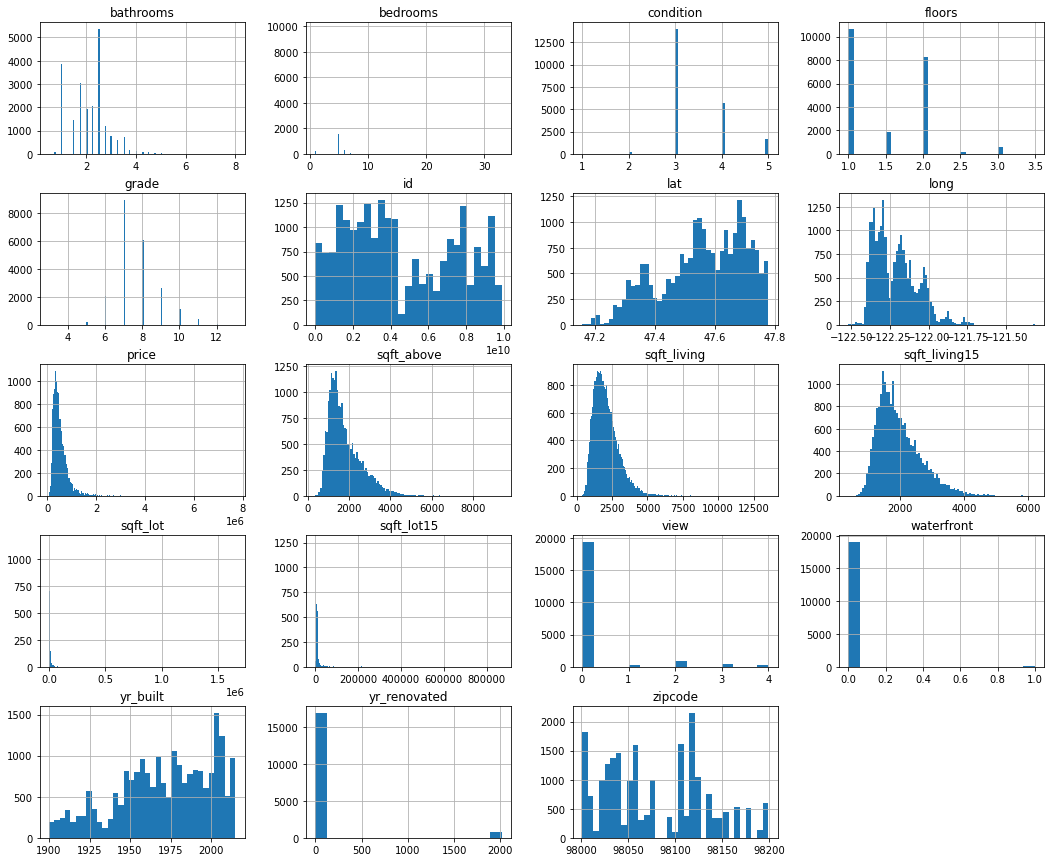

In [5]:
df.hist(figsize=(18,15), bins='auto');

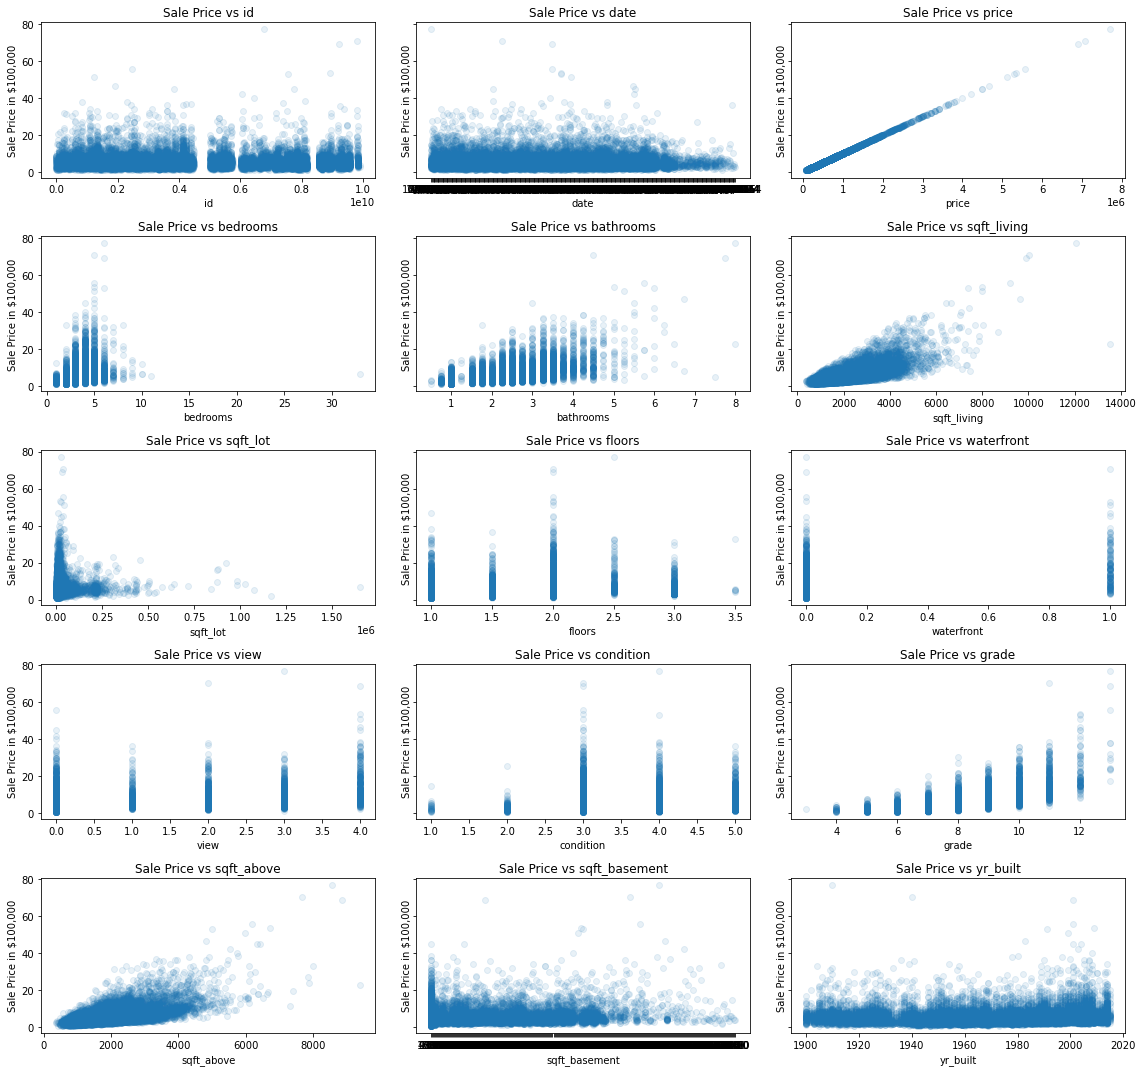

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

## Data cleaning plan
* Drop lat, long (we will use zipcode for location performace metrics)
* Drop id, not needed
* Drop data outside the 95th percentile to remove outliers
* Locate and deal with null values
* Look for and deal with any unusual data entries
* Confirm our data types and convert any incorrect data types
* separate our continuous from our categorical data, as well as our data to be binned
* transform and normalize

In [7]:
# drop lat and long, we will use zipcode for the location feature
# drop id, we don't need it

df.drop(['id', 'lat', 'long'], axis=1, inplace=True)

In [8]:
# looking for outliers in the percentiles

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [9]:
#Investigate Percentiles on the price column to look for outliers
column = df['price']

for q in np.linspace(.005, .995, num=21):
    s1q =  round(column.quantile(q=q), 2)
    print('{}th percentile:\tset1: {}'.format(round(q,2), s1q))

0.0th percentile:	set1: 133988.0
0.05th percentile:	set1: 215000.0
0.1th percentile:	set1: 249000.0
0.15th percentile:	set1: 273943.7
0.2th percentile:	set1: 299879.04
0.25th percentile:	set1: 324500.0
0.3th percentile:	set1: 347000.0
0.35th percentile:	set1: 372000.0
0.4th percentile:	set1: 399950.0
0.45th percentile:	set1: 425000.0
0.5th percentile:	set1: 450000.0
0.55th percentile:	set1: 481203.49
0.6th percentile:	set1: 518000.0
0.65th percentile:	set1: 550000.0
0.7th percentile:	set1: 591975.2
0.75th percentile:	set1: 640000.0
0.8th percentile:	set1: 700000.0
0.85th percentile:	set1: 775000.0
0.9th percentile:	set1: 875000.0
0.95th percentile:	set1: 1110000.0
1.0th percentile:	set1: 2450200.0


In [10]:
# remove outliers by keeping our center 99% of data
def percentile(column):
    lower_range = round(column.quantile(q=.005), 2)
    upper_range = round(column.quantile(q=.992), 2)
    return lower_range, upper_range

In [11]:
# determing our center 99% of data

lower_range, upper_range = percentile(column)
lower_range, upper_range

(133988.0, 2190000.0)

In [12]:
# dropping the things outside of our lower and upper range
df.drop(df[ (df.price > upper_range) | (df.price < lower_range) ].index , inplace=True)

#### Consider dropping by IQR instead

In [13]:
df

# confirming we still have over 20k entries

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,1410,1287


In [14]:
df.describe()

# checking our data again. Bedrooms still seems to have outliers.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.131700e+04,21317.000000,21317.000000,21317.000000,2.131700e+04,21317.000000,18971.000000,21255.000000,21317.000000,21317.000000,21317.000000,21317.000000,17533.000000,21317.000000,21317.000000,21317.000000
mean,5.236200e+05,3.370972,2.106769,2061.365436,1.507840e+04,1.493339,0.005535,0.220795,3.411174,7.642210,1774.665666,1971.103392,82.187874,98077.991275,1977.765070,12733.517474
std,2.924415e+05,0.919043,0.746088,864.524252,4.160336e+04,0.539383,0.074192,0.738604,0.648448,1.132441,794.901353,29.320012,396.608825,53.402143,669.753891,27355.761912
min,1.340000e+05,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.240000e+05,3.000000,1.750000,1430.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.588000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,1840.000000,7601.000000
75%,6.390000e+05,4.000000,2.500000,2530.000000,1.057800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,1997.000000,0.000000,98118.000000,2350.000000,10042.000000
max,2.190000e+06,33.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,2015.000000,2015.000000,98199.000000,5790.000000,871200.000000


In [15]:
#check what is going on with the weird bedroom value

df.sort_values('bedrooms', ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
15856,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,1330,4700
8748,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,1420,4960
13301,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090.0,2008,0.0,98004,2730,10400
19239,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060.0,1913,0.0,98105,1810,3745
15147,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600.0,1958,0.0,98006,2040,11914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11493,6/20/2014,250000.0,1,1.00,800,16306,1.0,NaN,0.0,2,6,680,120.0,1931,0.0,98168,1270,8666
11488,3/31/2015,229050.0,1,1.00,420,3298,1.0,0.0,0.0,4,4,420,0.0,1949,0.0,98136,1460,4975
14332,7/9/2014,321500.0,1,1.00,730,1942,1.0,0.0,0.0,3,7,730,0.0,2008,0.0,98144,1020,2183
17380,8/25/2014,145000.0,1,0.75,480,9750,1.0,0.0,0.0,2,4,480,0.0,1948,0.0,98146,1550,9924


In [16]:
# this value of 33 in 1620 square feet is obviously a mistake. We're going to impute the mean into this field.

bedroom_mean = round(df['bedrooms'].mean(), 0)
bedroom_mean
df.loc[df['bedrooms'] == 33.0, 'bedrooms'] = bedroom_mean

In [17]:
df.sort_values('bedrooms', ascending=False)

# fixed our bedroom outlier by imputing the mean

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
8748,8/21/2014,520000.0,11.0,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,1420,4960
15147,10/29/2014,650000.0,10.0,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600.0,1958,0.0,98006,2040,11914
19239,12/29/2014,660000.0,10.0,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060.0,1913,0.0,98105,1810,3745
13301,8/14/2014,1150000.0,10.0,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090.0,2008,0.0,98004,2730,10400
8537,8/11/2014,450000.0,9.0,7.50,4050,6504,2.0,0.0,0.0,3,7,4050,0.0,1996,0.0,98144,1448,3866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11493,6/20/2014,250000.0,1.0,1.00,800,16306,1.0,NaN,0.0,2,6,680,120.0,1931,0.0,98168,1270,8666
11488,3/31/2015,229050.0,1.0,1.00,420,3298,1.0,0.0,0.0,4,4,420,0.0,1949,0.0,98136,1460,4975
14332,7/9/2014,321500.0,1.0,1.00,730,1942,1.0,0.0,0.0,3,7,730,0.0,2008,0.0,98144,1020,2183
17380,8/25/2014,145000.0,1.0,0.75,480,9750,1.0,0.0,0.0,2,4,480,0.0,1948,0.0,98146,1550,9924


In [18]:
# sqft_lot also has some weird stuff happening, let's look at that too

df.sort_values('sqft_lot', ascending=False)

# there's a really big lot here, but it's not an obvious outlier. We leave it.

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
1717,3/27/2015,700000.0,4.0,1.00,1300,1651359,1.0,0.0,3.0,4,6,1300,0.0,1920,0.0,98022,2560,425581
17305,5/4/2015,190000.0,2.0,1.00,710,1164794,1.0,0.0,0.0,2,5,710,0.0,1915,0.0,98014,1680,16730
7640,5/21/2014,542500.0,5.0,3.25,3010,1074218,1.5,NaN,0.0,5,8,2010,1000.0,1931,0.0,98027,2450,68825
7762,1/19/2015,855000.0,4.0,3.50,4030,1024068,2.0,0.0,0.0,3,10,4030,0.0,2006,0.0,98045,1830,11700
3945,9/5/2014,998000.0,4.0,3.25,3770,982998,2.0,0.0,0.0,3,10,3770,0.0,1992,0.0,98058,2290,37141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20588,12/15/2014,256950.0,2.0,2.00,1070,635,2.0,0.0,0.0,3,9,720,350.0,2008,NaN,98106,1070,928
3449,4/22/2015,1230000.0,2.0,2.50,2470,609,3.0,0.0,0.0,3,11,1910,560.0,2011,0.0,98112,2440,1229
7582,1/22/2015,367500.0,2.0,2.00,1030,600,2.0,NaN,0.0,3,8,680,350.0,2004,0.0,98116,1120,1267
5821,1/7/2015,250000.0,3.0,2.25,1050,572,2.0,0.0,0.0,3,7,740,310.0,2006,0.0,98106,1260,1062


In [19]:
# look for nulls

df.isna().sum()

# all of our null values are in columns that I want to be binary flags. So, will change all non-null values > 0 in those
# columns to 1, and all null values to 0.
# this will turn waterfront, view and renovated into dichotomous choice flags

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2346
view               62
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3784
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [20]:
# change all non-null values > 0 in those columns to 1

df.loc[df['waterfront'] > 0, 'waterfront'] = 1
df.loc[df['view'] > 0, 'view'] = 1
df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1

In [21]:
# now anything that is not a 1 becomes a 0

df.loc[df['waterfront']!= 1, 'waterfront'] = 0
df.loc[df['view'] != 1, 'view'] = 0
df.loc[df['yr_renovated'] != 1, 'yr_renovated'] = 0

In [22]:
# since we're making it a binary flag, we'll rename yr_renovated to renovated
df = df.rename(columns={'yr_renovated' : 'renovated'})

In [23]:
# we've removed the null values from our three binary columns

df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [24]:
# check data types

df.dtypes

# date and sqft_basement need to be fixed. This explains why the basement variable didn't show
# up in our histogram

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
renovated        float64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [25]:
#Checking all top occuring for each column to find weird entries

for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

date 
 6/23/2014    0.006614
6/26/2014    0.006145
6/25/2014    0.006098
4/27/2015    0.005864
7/8/2014     0.005864
Name: date, dtype: float64 


price 
 450000.0    0.008069
350000.0    0.008069
550000.0    0.007459
500000.0    0.007130
425000.0    0.007037
Name: price, dtype: float64 


bedrooms 
 3.0    0.458179
4.0    0.319182
2.0    0.126659
5.0    0.072524
6.0    0.012338
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.251536
1.00    0.176197
1.75    0.142844
2.25    0.095839
2.00    0.090397
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006474
1400    0.006286
1440    0.006239
1800    0.006052
1010    0.006052
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016794
6000    0.013417
4000    0.011728
7200    0.010133
4800    0.005535
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494535
2.0    0.380917
1.5    0.088943
3.0    0.028522
2.5    0.006802
Name: floors, dtype: float64 


waterfront 
 0.0    0.995074
1.0    0.004926
Name: waterfront, dt

In [26]:
# basement has a weird entry of '?' which we will convert to a 0, and then
# converting our sqft_basement to a float,
# and our date to a proper date

df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['date'] = pd.to_datetime(df['date'])

In [27]:
# we're now going to extract just the month from our datetime, and store that in a new column
# we won't be using our entire date - we're interested in the month that houses are sold

df['month'] = pd.DatetimeIndex(df['date']).month

In [28]:
# data types are now fixed

df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
renovated               float64
zipcode                   int64
sqft_living15             int64
sqft_lot15                int64
month                     int64
dtype: object

In [29]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,sqft_living15,sqft_lot15,month
count,2.131700e+04,21317.000000,21317.000000,21317.000000,2.131700e+04,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000,21317.000000
mean,5.236200e+05,3.369564,2.106769,2061.365436,1.507840e+04,1.493339,0.004926,0.093775,3.411174,7.642210,1774.665666,280.793498,1971.103392,0.033870,98077.991275,1977.765070,12733.517474,6.574283
std,2.924415e+05,0.896360,0.746088,864.524252,4.160336e+04,0.539383,0.070012,0.291522,0.648448,1.132441,794.901353,429.448986,29.320012,0.180898,53.402143,669.753891,27355.761912,3.115028
min,1.340000e+05,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,1.000000
25%,3.240000e+05,3.000000,1.750000,1430.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,1490.000000,5100.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.588000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7601.000000,6.000000
75%,6.390000e+05,4.000000,2.500000,2530.000000,1.057800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,540.000000,1997.000000,0.000000,98118.000000,2350.000000,10042.000000,9.000000
max,2.190000e+06,11.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,1.000000,5.000000,13.000000,7420.000000,3260.000000,2015.000000,1.000000,98199.000000,5790.000000,871200.000000,12.000000


In [30]:
# now that its data type is correct, we see that most properties don't have basements. Because of this,
# we will add basement to our binary flag group, and just list if it has a basement or not.

df.loc[df['sqft_basement'] > 0, 'sqft_basement'] = 1
df.loc[df['sqft_basement'] != 1, 'sqft_basement'] = 0

# we'll also change the name of our column to basement
df = df.rename(columns={'sqft_basement' : 'basement'})

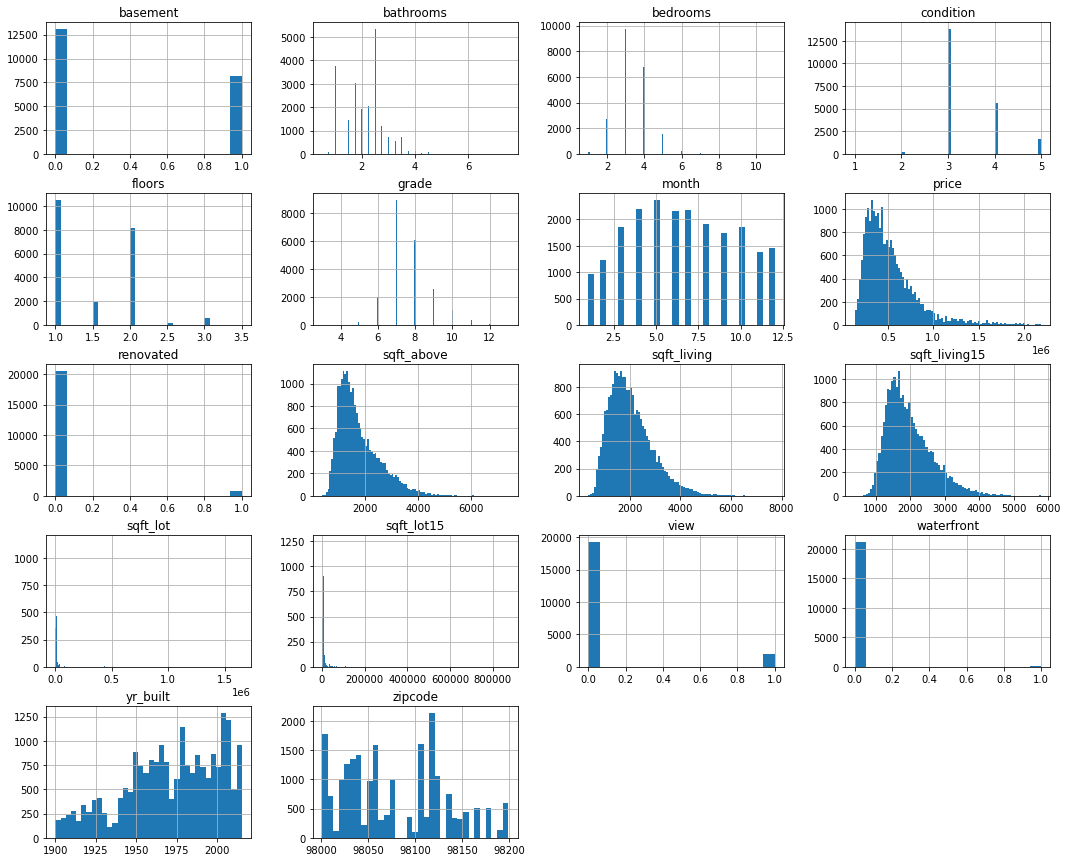

In [31]:
# check how our histograms are looking

df.hist(figsize=(18,15), bins='auto');

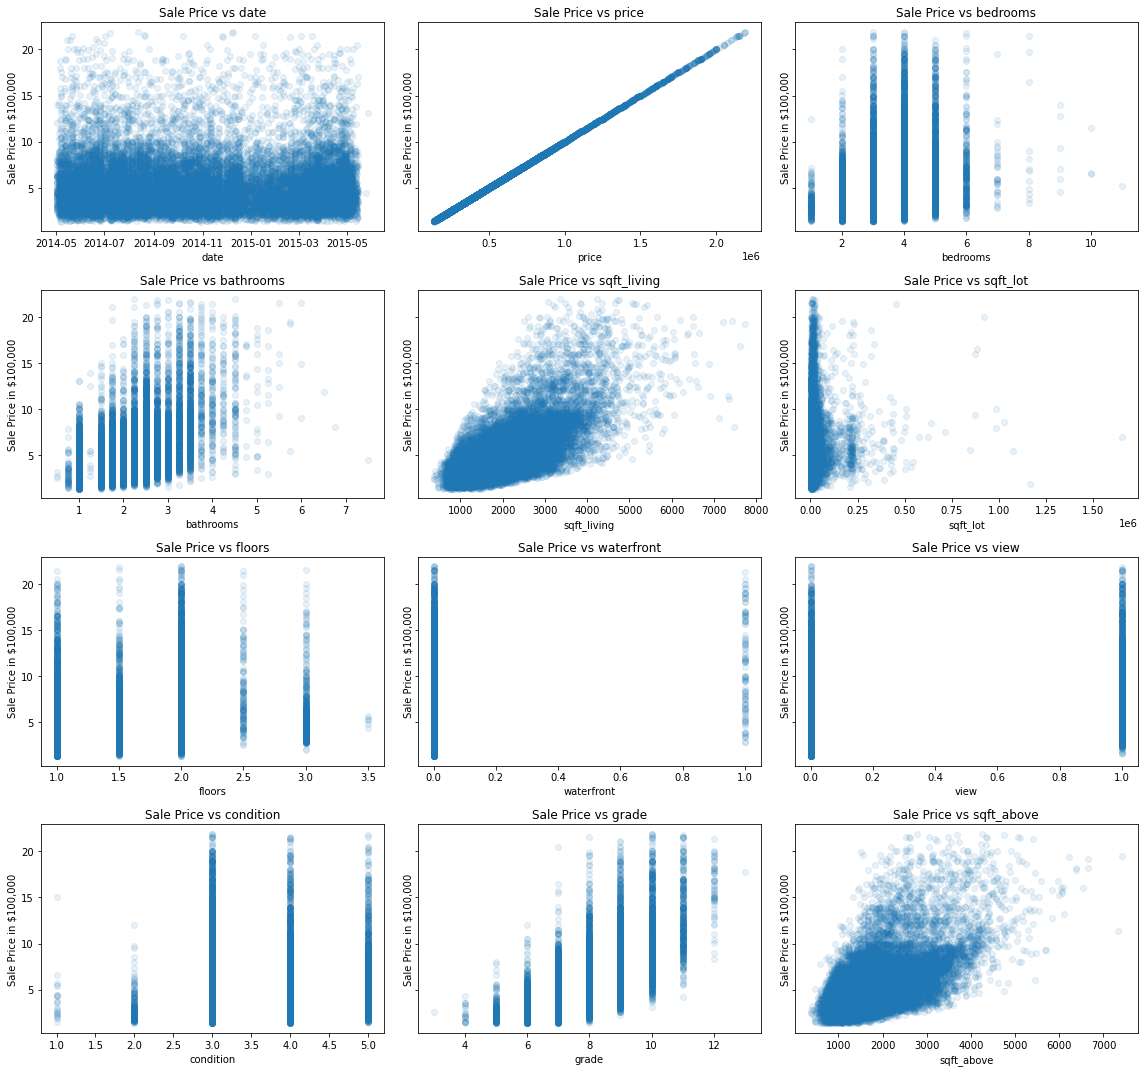

In [32]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

LinregressResult(slope=229.36015819795972, intercept=50824.930558951164, rvalue=0.6780412612474811, pvalue=0.0, stderr=1.7030233962886345)

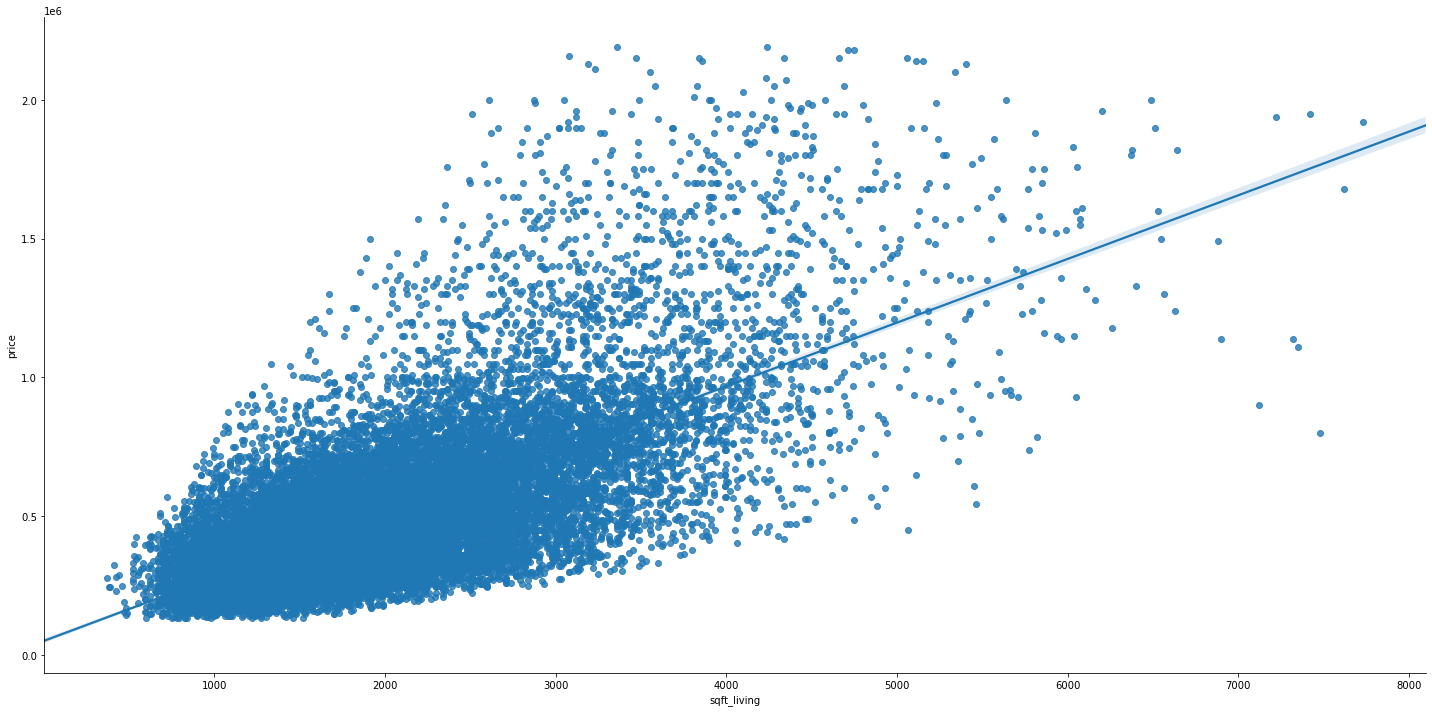

In [33]:
# sqft_living has the strongest and most obvious relationship to price thus far
from scipy.stats import linregress

x = 'sqft_living'
y = 'price'

scatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

linregress(df[x], df[y])

LinregressResult(slope=175131.7069152906, intercept=-814773.3263059095, rvalue=0.6781745295578772, pvalue=0.0, stderr=1299.8983912924805)

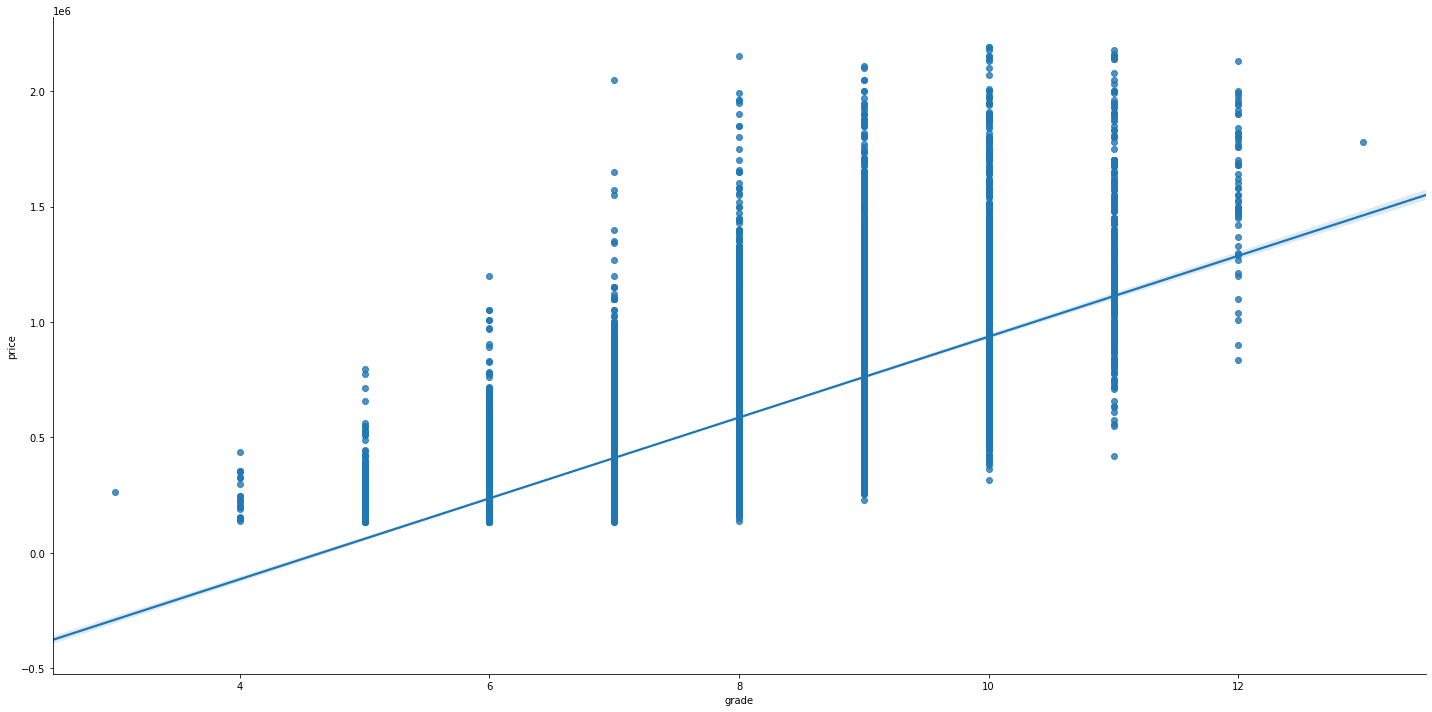

In [34]:
# sqft_living has the strongest and most obvious relationship to price thus far

x = 'grade'
y = 'price'

scatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

linregress(df[x], df[y])

# grade has a strong relationship, and is listed as the grade given to the property by King County.
# They are using their own predictive algorithm to rate the property and give this number, so it
# makes sense for it to have a strong relationship. I'm not sure I want to use a number that
# a buyer/seller doesn't have available when listing/buying a house. I will probably leave this out.

## Look for Multicollinearity

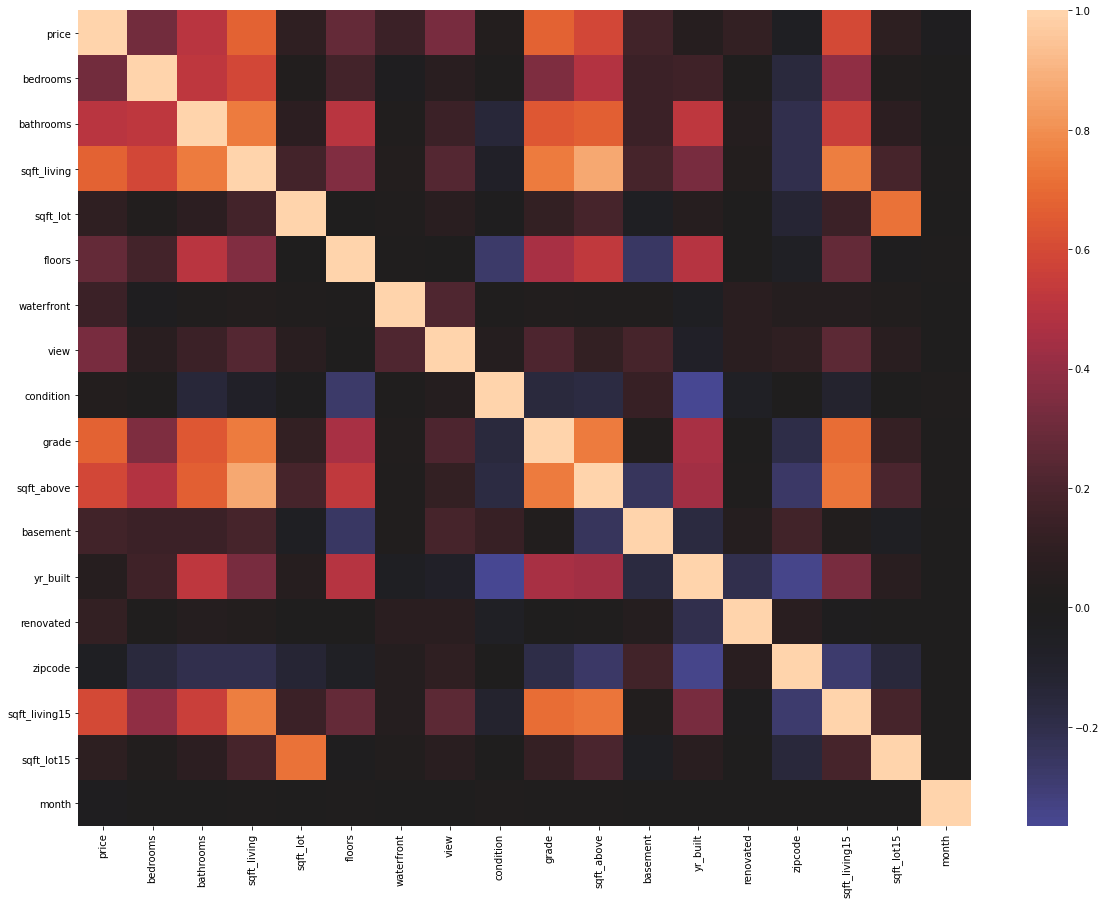

In [35]:
# look for multicollinearity of features
data_pred = df
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data_pred.corr(), center=0);

plt.show()

In [36]:
data_pred.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,sqft_living15,sqft_lot15,month
price,1.000000,0.317431,0.504923,0.678041,0.101672,0.274318,0.148508,0.332115,0.035070,0.678175,0.584205,0.170351,0.055248,0.111655,-0.043635,0.599385,0.091396,-0.015592
bedrooms,0.317431,1.000000,0.518007,0.593856,0.030836,0.173345,-0.022280,0.067008,0.017415,0.348595,0.482947,0.151571,0.158739,0.014517,-0.156751,0.394001,0.029039,-0.000961
bathrooms,0.504923,0.518007,1.000000,0.740835,0.085155,0.503231,0.018447,0.147871,-0.137533,0.647120,0.668118,0.145506,0.518982,0.039769,-0.204757,0.553908,0.085033,0.007220
sqft_living,0.678041,0.593856,0.740835,1.000000,0.175439,0.351138,0.037955,0.236315,-0.070014,0.748268,0.867632,0.186819,0.332440,0.038929,-0.203107,0.754101,0.186781,0.011886
sqft_lot,0.101672,0.030836,0.085155,0.175439,1.000000,-0.006680,0.019355,0.066969,-0.009006,0.114149,0.184839,-0.036424,0.052373,0.004535,-0.130001,0.144690,0.718080,-0.002385
floors,0.274318,0.173345,0.503231,0.351138,-0.006680,1.000000,0.008323,0.004570,-0.272363,0.457226,0.526806,-0.263508,0.493751,0.002072,-0.059498,0.274520,-0.012388,0.012747
waterfront,0.148508,-0.022280,0.018447,0.037955,0.019355,0.008323,1.000000,0.218715,0.015321,0.033472,0.021241,0.022993,-0.036426,0.075727,0.044907,0.043216,0.029287,0.002517
view,0.332115,0.067008,0.147871,0.236315,0.066969,0.004570,0.218715,1.000000,0.044686,0.206083,0.119547,0.178857,-0.068561,0.076767,0.098514,0.249488,0.063294,-0.007232
condition,0.035070,0.017415,-0.137533,-0.070014,-0.009006,-0.272363,0.015321,0.044686,1.000000,-0.161182,-0.171920,0.128219,-0.366018,-0.055138,0.003812,-0.101797,-0.003833,0.022584
grade,0.678175,0.348595,0.647120,0.748268,0.114149,0.457226,0.033472,0.206083,-0.161182,1.000000,0.743037,0.029740,0.457680,0.006028,-0.185030,0.703782,0.120510,0.008392


In [37]:
#Get our list of highly correlated feature pairs with following steps:

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df_correlations = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df_correlations['pairs'] = list(zip(df_correlations.level_0, df_correlations.level_1))

# set index to pairs
df_correlations.set_index(['pairs'], inplace = True)

# rename our results column to correlation
df_correlations.rename(columns={0: "correlation"}, inplace=True)

# Drop 1:1 correlations to get rid of self pairs
df_correlations.drop(df_correlations[df_correlations['correlation'] == 1.000000].index, inplace=True)

# view pairs above 75% correlation
df_correlations[df_correlations.correlation>.75]


,level_0,level_1,correlation
pairs,,,
"(sqft_above, sqft_living)",sqft_above,sqft_living,0.867632
"(sqft_living, sqft_above)",sqft_living,sqft_above,0.867632
"(sqft_living, sqft_living15)",sqft_living,sqft_living15,0.754101
"(sqft_living15, sqft_living)",sqft_living15,sqft_living,0.754101


In [38]:
# we're going to drop sqft_above and sqft_living15, and just keep the base sqft_living
# We'll do that simply by excluding it from our processed dataframe
# even though sqft_lot_15 has correlation within acceptable range, this is a difficult value
# for a buyer or seller to know and use in prediction, so we will leave it off our model

In [39]:
df.reset_index(drop=True, inplace=True)

In [40]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,sqft_living15,sqft_lot15,month
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,10
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1.0,1951,1.0,98125,1690,7639,12
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,2
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1.0,1965,0.0,98136,1360,5000,12
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21312,2014-05-21,360000.0,3.0,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,1530,1509,5
21313,2015-02-23,400000.0,4.0,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200,2
21314,2014-06-23,402101.0,2.0,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007,6
21315,2015-01-16,400000.0,3.0,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,1410,1287,1


## Separate pre-processing categories

In [41]:
# prepare our categories for data transformation by separating into our data types -
# ordinal, continuous, categorical/dichotomous, and need to be binned/further processed

#ordinal = ['zipcode', 'floors', 'bedrooms', 'bathrooms', 'condition'] #uncomment if we do not bin zip codes
ordinal = ['floors', 'bedrooms', 'bathrooms', 'condition'] #   #uncomment if we bin zip codes , 
continuous = ['sqft_living', 'sqft_lot']  # 'sqft_lot15', 
categorical_dichotomous = ['waterfront', 'view', 'renovated','basement']
# bins = ['yr_built', 'month'] #uncomment if we do not bin zip codes
bins = ['month', 'yr_built','zipcode'] #uncomment if we bin zip codes  
target = ['price']

### Target Variable

In [42]:
df_target = df[target]

df_target

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21312,360000.0
21313,400000.0
21314,402101.0
21315,400000.0


In [43]:
log_names = [f'{column}' for column in df_target.columns]

df_target_log = np.log(df_target)
df_target_log.columns = log_names

df_target_log

,price
0,12.309982
1,13.195614
2,12.100712
3,13.311329
4,13.142166
...,...
21312,12.793859
21313,12.899220
21314,12.904459
21315,12.899220


### Ordinal (floors, bedrooms, bathrooms, condition)

In [44]:
df_ordinal = df[ordinal]

df_ordinal

# our ordinal data is ready to be added to our dataframe for final processing

,floors,bedrooms,bathrooms,condition
0,1.0,3.0,1.00,3
1,2.0,3.0,2.25,3
2,1.0,2.0,1.00,3
3,1.0,4.0,3.00,5
4,1.0,3.0,2.00,3
...,...,...,...,...
21312,3.0,3.0,2.50,3
21313,2.0,4.0,2.50,3
21314,2.0,2.0,0.75,3
21315,2.0,3.0,2.50,3


### High cardinality categoricals (Year built, Zip Code)

In [45]:
df_bins = df[bins]
df_bins

,month,yr_built,zipcode
0,10,1955,98178
1,12,1951,98125
2,2,1933,98028
3,12,1965,98136
4,2,1987,98074
...,...,...,...
21312,5,2009,98103
21313,2,2014,98146
21314,6,2009,98144
21315,1,2004,98027


In [46]:
# we're using the median house value for a zip code to determine the zip code's sort

zipsorted = pd.DataFrame(df.groupby('zipcode')['price'].median().sort_values(ascending=True))
zipsorted

,price
zipcode,
98002,235000.0
98168,241250.0
98032,250000.0
98001,260000.0
98188,265000.0
...,...
98005,765475.0
98112,875000.0
98040,980000.0


In [47]:
#We want to make 10 bins of 7 zip codes, with the zip codes sorted by median value
# so that we have the 7 highest median value zip codes in a group, then the next 7 highest, etc


zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),7)[0]+1

In [48]:
zipsorted

,price,rank
zipcode,,
98002,235000.0,1
98168,241250.0,1
98032,250000.0,1
98001,260000.0,1
98188,265000.0,1
...,...,...
98005,765475.0,10
98112,875000.0,10
98040,980000.0,10


In [49]:
# we're dropping our price column; we don't need to do that from a programming standpoint,
# but we'll able to use this zipsorted table as our zipcode lookup for our rank numbers,
# so it's helpful if it's tidy.
# to that end we will re-sort the index by zip code so we have a clean lookup table for later
zipsorted.drop('price', axis=1, inplace=True)
zipsorted.sort_index(inplace=True, ascending=True)

In [50]:
zipsorted

,rank
zipcode,
98001,1
98002,1
98003,1
98004,10
98005,10
...,...
98177,7
98178,2
98188,1


In [51]:
def cat_zips(x, zipsorted):
    y = zipsorted.loc[(zipsorted.index == x)]['rank']
    z = np.array(y)
    z[0]
    return z[0]

In [52]:
# make a new zip_group column in our ordinal dataframe and convert all of our zipcodes to their respective rankings

# df_ordinal['zip_group'] = df_ordinal['zipcode'].apply(lambda x: cat_zips(x, zipsorted)) # uncomment if we do not bin zip codes
df_bins['zip_group'] = df_bins['zipcode'].apply(lambda x: cat_zips(x, zipsorted)) # uncomment if we bin zip codes

In [53]:
# get rid of our original zipcode
#df_ordinal.drop(['zipcode'],axis=1,  inplace=True) # uncomment if we do not bin zip codes
df_bins.drop(['zipcode'],axis=1,  inplace=True) # uncomment if we bin zip codes

In [54]:
# This is our set that will be broken into high-cardinality dummy variables
df_bins

,month,yr_built,zip_group
0,10,1955,2
1,12,1951,5
2,2,1933,5
3,12,1965,6
4,2,1987,8
...,...,...,...
21312,5,2009,7
21313,2,2014,3
21314,6,2009,6
21315,1,2004,8


In [55]:
# looking at our year built distribution. We're going to cut this into 5 bins instead of using it
# as a continuous value.

df_bins['yr_built'].describe()

count    21317.000000
mean      1971.103392
std         29.320012
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [56]:
# binning our year built into equally sized bins

df_bins["year_block"] = pd.qcut(df['yr_built'], q=6)

df_bins

,month,yr_built,zip_group,year_block
0,10,1955,2,"(1942.0, 1959.0]"
1,12,1951,5,"(1942.0, 1959.0]"
2,2,1933,5,"(1899.999, 1942.0]"
3,12,1965,6,"(1959.0, 1975.0]"
4,2,1987,8,"(1975.0, 1989.0]"
...,...,...,...,...
21312,5,2009,7,"(2003.0, 2015.0]"
21313,2,2014,3,"(2003.0, 2015.0]"
21314,6,2009,6,"(2003.0, 2015.0]"
21315,1,2004,8,"(2003.0, 2015.0]"


In [57]:
df_bins['month'] = df_bins['month'].astype('category')
df_bins['zip_group'] = df_bins['zip_group'].astype('category') #uncomment if we bin zip codes

In [58]:
#dummybins = ['year_block', 'month'] # uncomment if we do not bin zip codes
dummybins = ['year_block', 'month', 'zip_group'] #uncomment if we bin zip codes

# make a processed bins file for use with linear regression
processed_bins = pd.get_dummies(df_bins[dummybins], prefix=dummybins, drop_first=True)

# no drop version for tree algorithms
processed_bins_nodrop = pd.get_dummies(df_bins[dummybins], prefix=dummybins)

In [59]:
processed_bins

,"year_block_(1942.0, 1959.0]","year_block_(1959.0, 1975.0]","year_block_(1975.0, 1989.0]","year_block_(1989.0, 2003.0]","year_block_(2003.0, 2015.0]",month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,zip_group_10
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21312,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21313,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21314,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21315,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Dichotomous Categoricals (waterfront, view, renovated, basement)

In [60]:
# remind myself of the list of things I am converting

categorical_dichotomous

['waterfront', 'view', 'renovated', 'basement']

In [61]:
# make sure these are category type

df[categorical_dichotomous] = df[categorical_dichotomous].astype('category')

In [62]:
# make dummies in a new df

# standard processed cats dropping first dummy variable for linear regression
processed_cats = pd.get_dummies(df[categorical_dichotomous], prefix=categorical_dichotomous, drop_first=True)

In [63]:
# new dataframe of dummy categorical data, ready to add to final df

processed_cats

,waterfront_1.0,view_1.0,renovated_1.0,basement_1.0
0,0,0,0,0
1,0,0,1,1
2,0,0,0,0
3,0,0,0,1
4,0,0,0,0
...,...,...,...,...
21312,0,0,0,0
21313,0,0,0,0
21314,0,0,0,0
21315,0,0,0,0


### Set - Continuous

In [64]:
continuous

['sqft_living', 'sqft_lot']

In [65]:
df_continuous = df[continuous]
df_continuous

,sqft_living,sqft_lot
0,1180,5650
1,2570,7242
2,770,10000
3,1960,5000
4,1680,8080
...,...,...
21312,1530,1131
21313,2310,5813
21314,1020,1350
21315,1600,2388


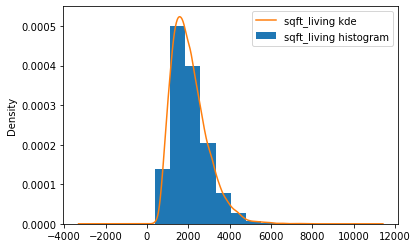

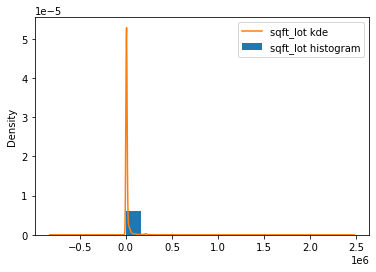

In [66]:
# check out our histograms for our continuous data

for column in df_continuous:
    df[column].plot.hist(density=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

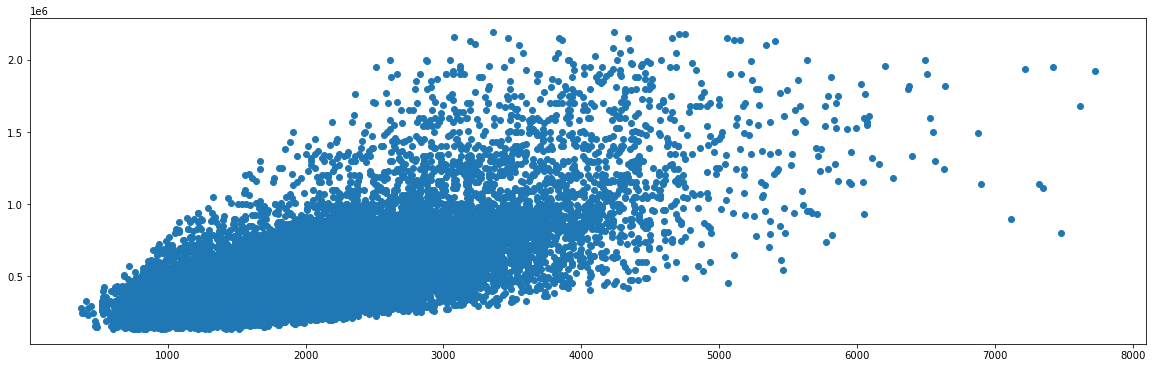

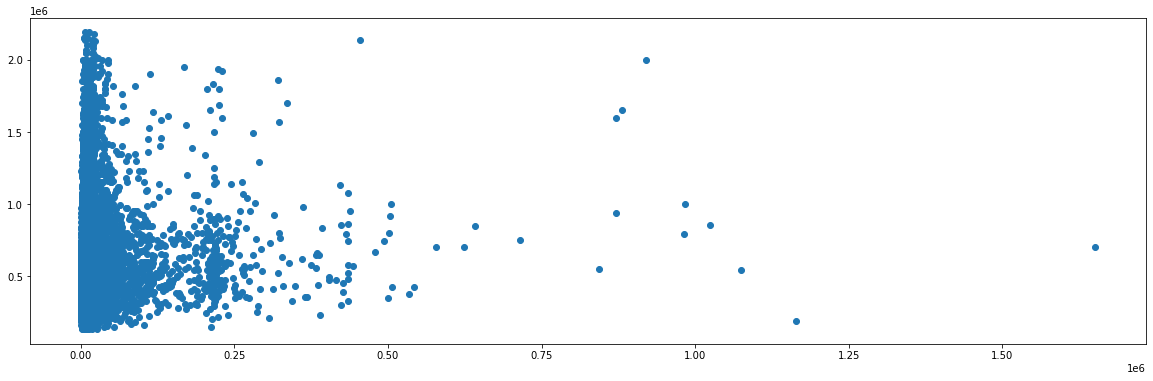

In [67]:
# let's check linearity of these features with our target data

fig, axs = plt.subplots(figsize=(20, 6))
plt.scatter(df_continuous.sqft_living, df_target.price)
plt.show()

fig, axs = plt.subplots(figsize=(20, 6))
plt.scatter(df_continuous.sqft_lot, df_target.price)
plt.show()

In [68]:
# Our lot data is not normal! We're going to try transforming and standardizing all of these.

In [69]:
# log features
log_names = [f'{column}' for column in df_continuous.columns]

df_continuous_log = np.log(df_continuous)
df_continuous_log.columns = log_names

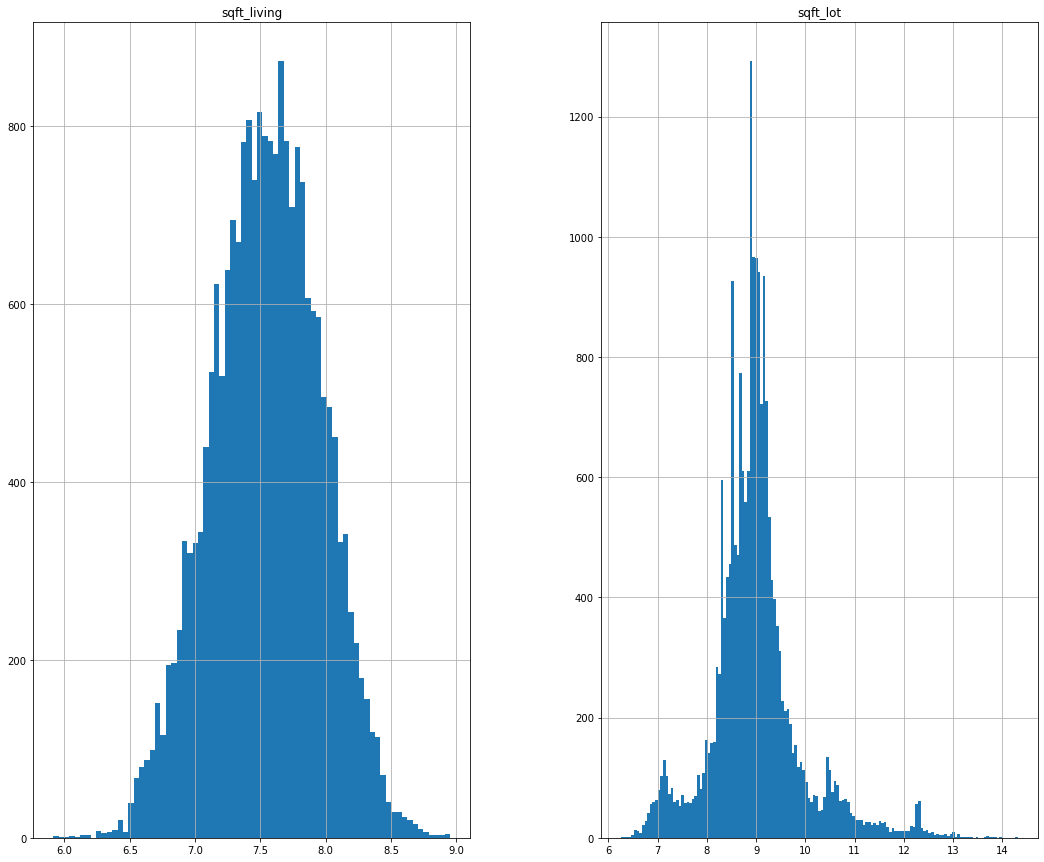

In [70]:
# check out our histograms for our transformed data

df_continuous_log.hist(figsize=(18,15), bins='auto');

# looks better

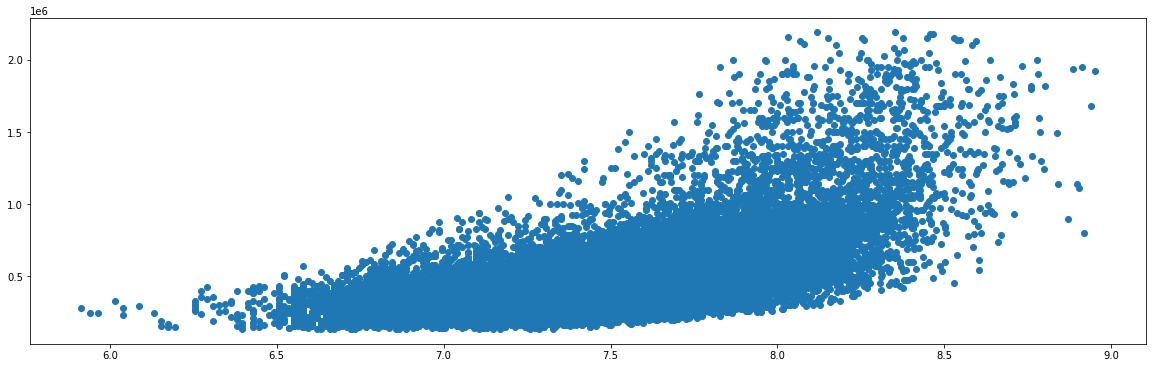

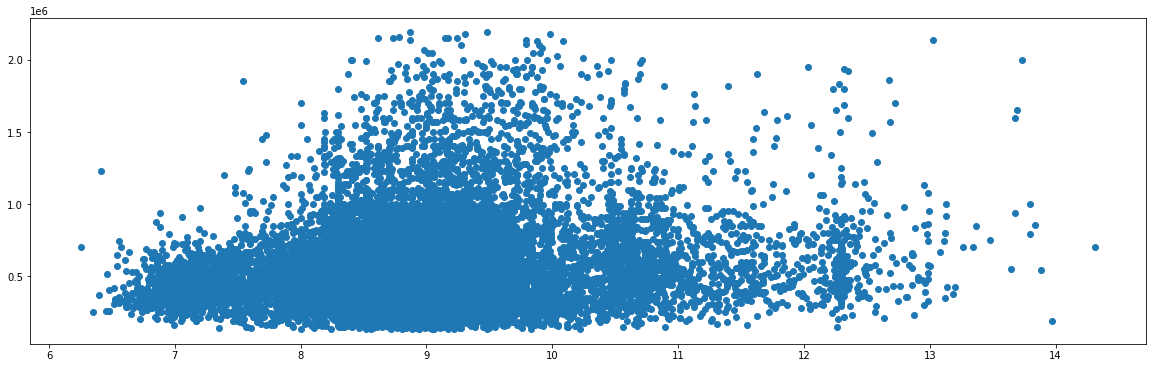

In [71]:
# let's check linearity of these features with our target data

fig, axs = plt.subplots(figsize=(20, 6))
plt.scatter(df_continuous_log.sqft_living, df_target.price)
plt.show()

fig, axs = plt.subplots(figsize=(20, 6))
plt.scatter(df_continuous_log.sqft_lot, df_target.price)
plt.show()

## Data Prep for Linear and Tree Regression

### Data Prep - Decision Tree

Tree regressors are insensitive to feature scaling. We will build a data set for tree regressors that has our data un-scaled and unaltered.

There are a few occasions when it’s better to one-hot encode variables into k variables instead of k-1:
* When building tree-based algorithms.
* When making feature selection with recursive algorithms.
* When interested in determining the importance of every single category

In [72]:
preprocessed_trees = pd.concat([df_target, df_ordinal, df_continuous, processed_bins_nodrop, processed_cats], axis=1)

In [73]:
# preprocessed data ready for tree-based algorithm

preprocessed_trees

,price,floors,bedrooms,bathrooms,condition,sqft_living,sqft_lot,"year_block_(1899.999, 1942.0]","year_block_(1942.0, 1959.0]","year_block_(1959.0, 1975.0]","year_block_(1975.0, 1989.0]","year_block_(1989.0, 2003.0]","year_block_(2003.0, 2015.0]",month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,zip_group_1,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,zip_group_10,waterfront_1.0,view_1.0,renovated_1.0,basement_1.0
0,221900.0,1.0,3.0,1.00,3,1180,5650,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,2.0,3.0,2.25,3,2570,7242,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1
2,180000.0,1.0,2.0,1.00,3,770,10000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,604000.0,1.0,4.0,3.00,5,1960,5000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,510000.0,1.0,3.0,2.00,3,1680,8080,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21312,360000.0,3.0,3.0,2.50,3,1530,1131,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21313,400000.0,2.0,4.0,2.50,3,2310,5813,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
21314,402101.0,2.0,2.0,0.75,3,1020,1350,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21315,400000.0,2.0,3.0,2.50,3,1600,2388,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Data Prep - Linear Regression

To prepare our data for linear regression, which is sensitive to feature scaling, we need to
* use our dummy data with our first feature dropped
* scale all of our numerical features

In [74]:
# first we're going to combine all of our features that should be normalized (all features that are not encoded)

In [75]:
normalize_this = pd.concat([df_ordinal, df_continuous_log], axis=1)

In [76]:
normalize_this

,floors,bedrooms,bathrooms,condition,sqft_living,sqft_lot
0,1.0,3.0,1.00,3,7.073270,8.639411
1,2.0,3.0,2.25,3,7.851661,8.887653
2,1.0,2.0,1.00,3,6.646391,9.210340
3,1.0,4.0,3.00,5,7.580700,8.517193
4,1.0,3.0,2.00,3,7.426549,8.997147
...,...,...,...,...,...,...
21312,3.0,3.0,2.50,3,7.333023,7.030857
21313,2.0,4.0,2.50,3,7.745003,8.667852
21314,2.0,2.0,0.75,3,6.927558,7.207860
21315,2.0,3.0,2.50,3,7.377759,7.778211


In [77]:
# normalize with scikit-learn StandardScaler

#def normalize(feature):
#    return (feature - feature.mean()) / feature.std()

#df_transformed = normalize_this.apply(normalize)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#df_transformed = scaler.fit_transform(normalize_this)

df_transformed = pd.DataFrame(scaler.fit_transform(normalize_this),columns = normalize_this.columns)



In [78]:
df_transformed

,floors,bedrooms,bathrooms,condition,sqft_living,sqft_lot
0,-0.914656,-0.412304,-1.483465,-0.634104,-1.146629,-0.382008
1,0.939357,-0.412304,0.191980,-0.634104,0.737420,-0.107072
2,-0.914656,-1.527954,-1.483465,-0.634104,-2.179864,0.250314
3,-0.914656,0.703345,1.197247,2.450255,0.081575,-0.517368
4,-0.914656,-0.412304,-0.143109,-0.634104,-0.291538,0.014196
...,...,...,...,...,...,...
21312,2.793370,-0.412304,0.527069,-0.634104,-0.517912,-2.163532
21313,0.939357,0.703345,0.527069,-0.634104,0.479260,-0.350509
21314,0.939357,-1.527954,-1.818554,-0.634104,-1.499316,-1.967497
21315,0.939357,-0.412304,0.527069,-0.634104,-0.409631,-1.335814


In [79]:
processed_cats


,waterfront_1.0,view_1.0,renovated_1.0,basement_1.0
0,0,0,0,0
1,0,0,1,1
2,0,0,0,0
3,0,0,0,1
4,0,0,0,0
...,...,...,...,...
21312,0,0,0,0
21313,0,0,0,0
21314,0,0,0,0
21315,0,0,0,0


In [80]:
processed_bins

,"year_block_(1942.0, 1959.0]","year_block_(1959.0, 1975.0]","year_block_(1975.0, 1989.0]","year_block_(1989.0, 2003.0]","year_block_(2003.0, 2015.0]",month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,zip_group_10
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21312,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21313,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21314,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21315,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [81]:
preprocessed_scaled = pd.concat([df_target_log, df_transformed, processed_cats, processed_bins], axis=1)


In [82]:
# preprocessed data ready for linear regression algorithm

preprocessed_scaled

,price,floors,bedrooms,bathrooms,condition,sqft_living,sqft_lot,waterfront_1.0,view_1.0,renovated_1.0,basement_1.0,"year_block_(1942.0, 1959.0]","year_block_(1959.0, 1975.0]","year_block_(1975.0, 1989.0]","year_block_(1989.0, 2003.0]","year_block_(2003.0, 2015.0]",month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,zip_group_10
0,12.309982,-0.914656,-0.412304,-1.483465,-0.634104,-1.146629,-0.382008,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,13.195614,0.939357,-0.412304,0.191980,-0.634104,0.737420,-0.107072,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,12.100712,-0.914656,-1.527954,-1.483465,-0.634104,-2.179864,0.250314,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,13.311329,-0.914656,0.703345,1.197247,2.450255,0.081575,-0.517368,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,13.142166,-0.914656,-0.412304,-0.143109,-0.634104,-0.291538,0.014196,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21312,12.793859,2.793370,-0.412304,0.527069,-0.634104,-0.517912,-2.163532,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21313,12.899220,0.939357,0.703345,0.527069,-0.634104,0.479260,-0.350509,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21314,12.904459,0.939357,-1.527954,-1.818554,-0.634104,-1.499316,-1.967497,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21315,12.899220,0.939357,-0.412304,0.527069,-0.634104,-0.409631,-1.335814,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


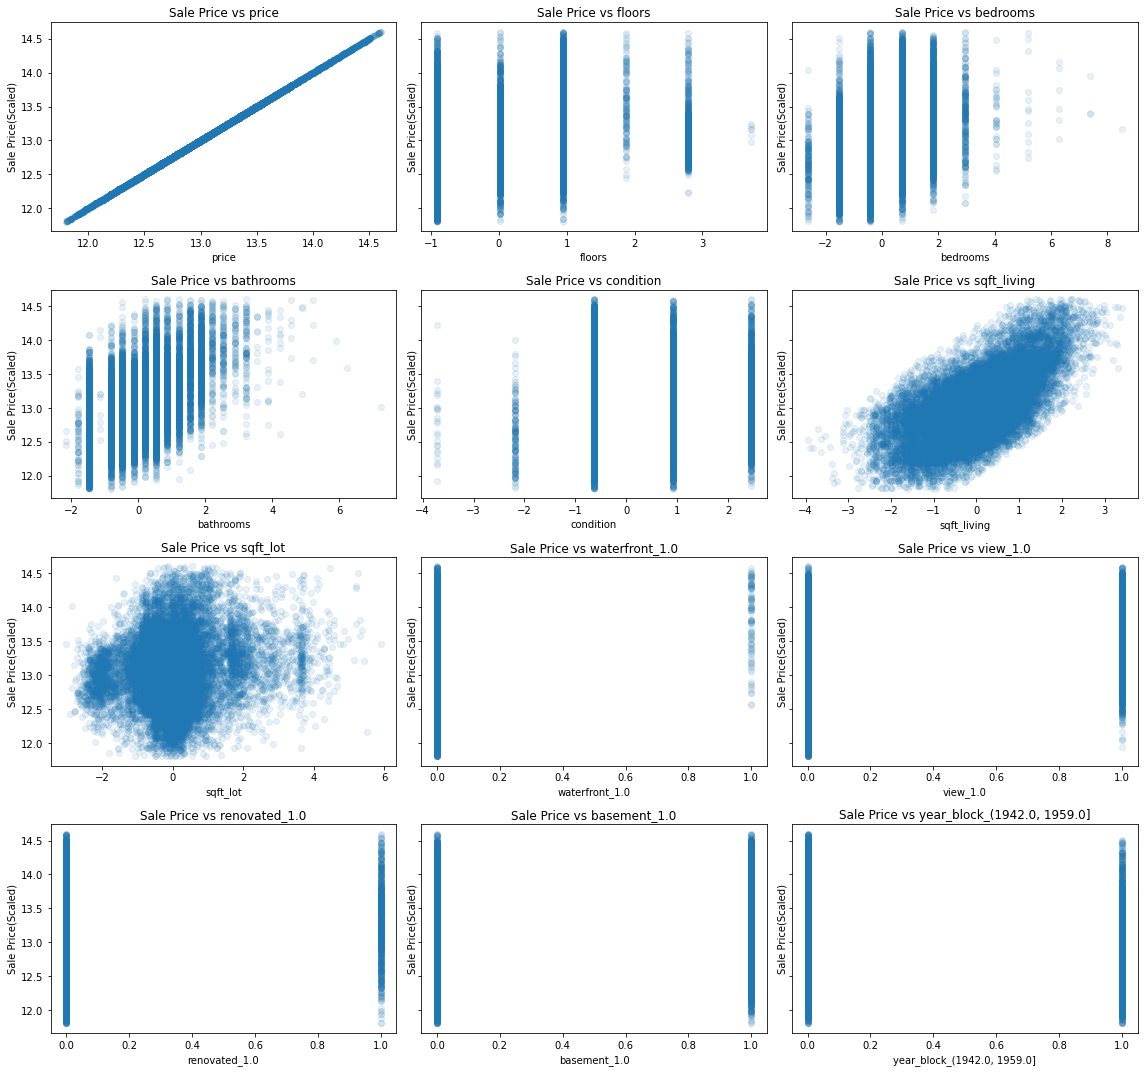

In [83]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), preprocessed_scaled.columns):
    ax.scatter(preprocessed_scaled[column], preprocessed_scaled['price'], label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price(Scaled)')

fig.tight_layout()

# Linear Regression Model

## Base Linear Regression Model

For our linear regression models, we use our data set

preprocessed_scaled

In [117]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
actual = np.exp(y_test)
X_test = sm.add_constant(X_test)

Run a base model with no cross-validation or specific feature selection

In [119]:
predictors_train = sm.add_constant(X_train)
model = sm.OLS(y_train, predictors_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     2176.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:31:47   Log-Likelihood:                 2353.5
No. Observations:               17053   AIC:                            -4635.
Df Residuals:                   17017   BIC:                            -4356.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.6728      0.011   1179.289      0.000      12.652      12.694
floors                          0.0116      0.003      4.502      0.000       0.007       0.017
bedrooms                       -0.0296      0.002    -13.457      0.000      -0.034      -0.025
bathrooms                       0.0480      0.003     16.371      0.000       0.042       0.054
condition                       0.0205      0.002     11.268      0.000       0.017       0.024
sqft_living                     0.2388      0.003     75.430      0.000       0.233       0.245
sqft_lot                        0.0280      0.002     13.103      0.000       0.024       0.032
waterfront_1.0                  0.4352      0.024     18.047      0.000       0.388       0.482
view_1.0                        0.2012      0.006     33.299      0.000       0.189       0.213
renovated_1.0                   0.0513      0.010      5.369      0.000       0.033       0.070
basement_1.0                   -0.0206      0.004     -5.056      0.000      -0.029      -0.013
year_block_(1942.0, 1959.0]    -0.0851      0.006    -14.628      0.000      -0.096      -0.074
year_block_(1959.0, 1975.0]    -0.1541      0.006    -25.375      0.000      -0.166      -0.142
year_block_(1975.0, 1989.0]    -0.1767      0.006    -27.848      0.000      -0.189      -0.164
year_block_(1989.0, 2003.0]    -0.1473      0.007    -19.846      0.000      -0.162      -0.133
year_block_(2003.0, 2015.0]    -0.0950      0.008    -12.415      0.000      -0.110      -0.080
month_2                         0.0085      0.010      0.839      0.402      -0.011       0.028
month_3                         0.0375      0.009      3.985      0.000       0.019       0.056
month_4                         0.0614      0.009      6.721      0.000       0.044       0.079
month_5                         0.0078      0.009      0.868      0.385      -0.010       0.026
month_6                        -0.0014      0.009     -0.152      0.879      -0.019       0.017
month_7                        -0.0095      0.009     -1.036      0.300      -0.027       0.008
month_8                        -0.0093      0.009     -0.995      0.320      -0.028       0.009
month_9                        -0.0214      0.009     -2.253      0.024      -0.040      -0.003
month_10                       -0.0167      0.009     -1.781      0.075      -0.035       0.002
month_11                       -0.0202      0.010     -2.032      0.042      -0.040      -0.001
month_12                       -0.0056      0.010     -0.574      0.566      -0.025       0.014
zip_group_2                     0.0482      0.008      6.154      0.000       0.033       0.064
zip_group_3                     0.1687      0.008     22.239      0.000       0.154       0.184
zip_group_4

In [120]:
print("{} predictors used".format(X.shape[1]))

35 predictors used


In [121]:
#predictors_test = sm.add_constant(X_test)
predicted_home_prices = model.predict(X_test)

predicted_prices_unscaled = round(np.exp(predicted_home_prices), 0)
predicted_prices_unscaled

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_prices_unscaled})
predicted_prices['Abs_Diff'] = abs(predicted_prices.Actual - predicted_prices.Predicted)
predicted_prices

,Actual,Predicted,Abs_Diff
10895,325000.0,316388.0,8612.0
14750,650000.0,1011063.0,361063.0
9935,356000.0,320217.0,35783.0
6826,345000.0,405713.0,60713.0
11090,468000.0,596046.0,128046.0
...,...,...,...
5437,355000.0,324056.0,30944.0
17128,390000.0,393715.0,3715.0
7588,485000.0,451823.0,33177.0
10186,535000.0,426352.0,108648.0


In [122]:
round(mean_absolute_error(actual, predicted_prices_unscaled), 2)

89020.05

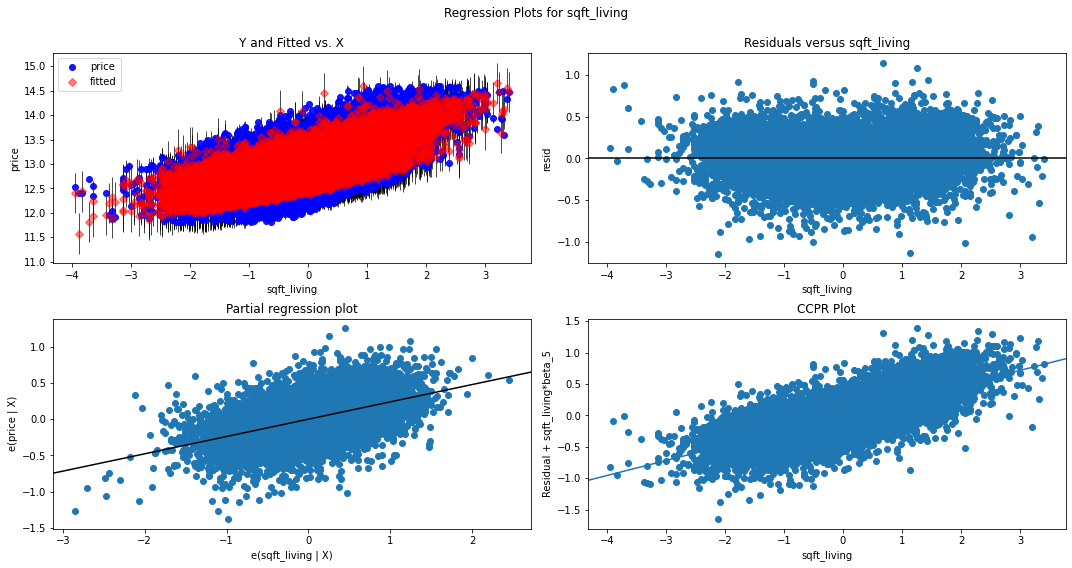

In [123]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

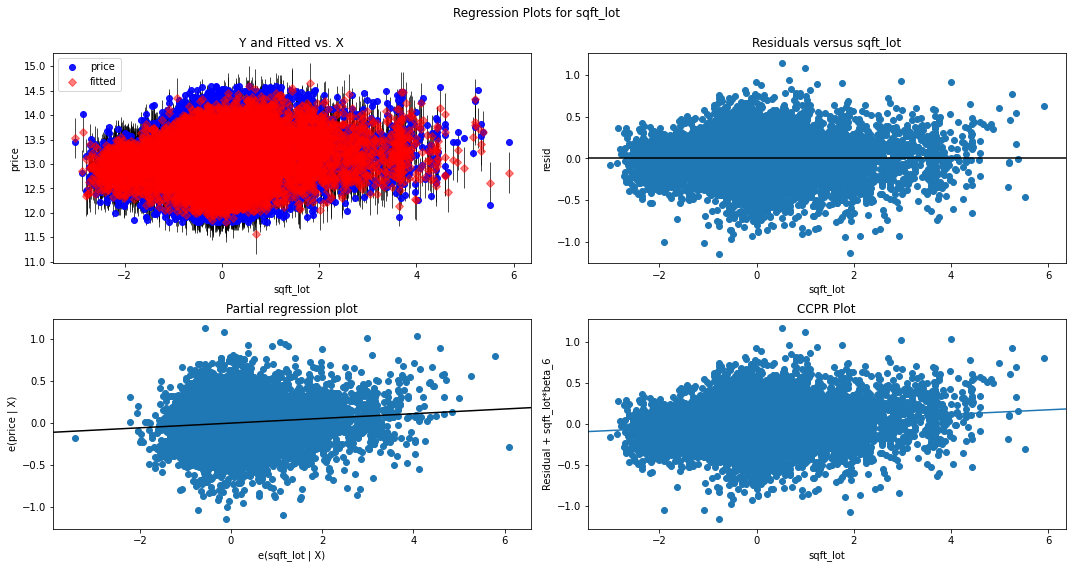

In [124]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

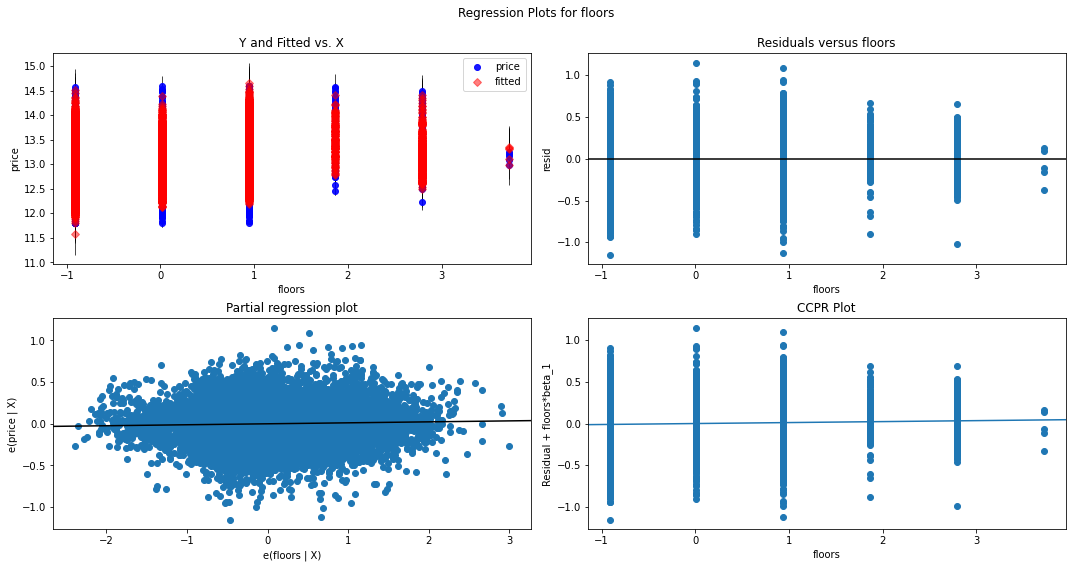

In [132]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "floors", fig=fig)
plt.show()

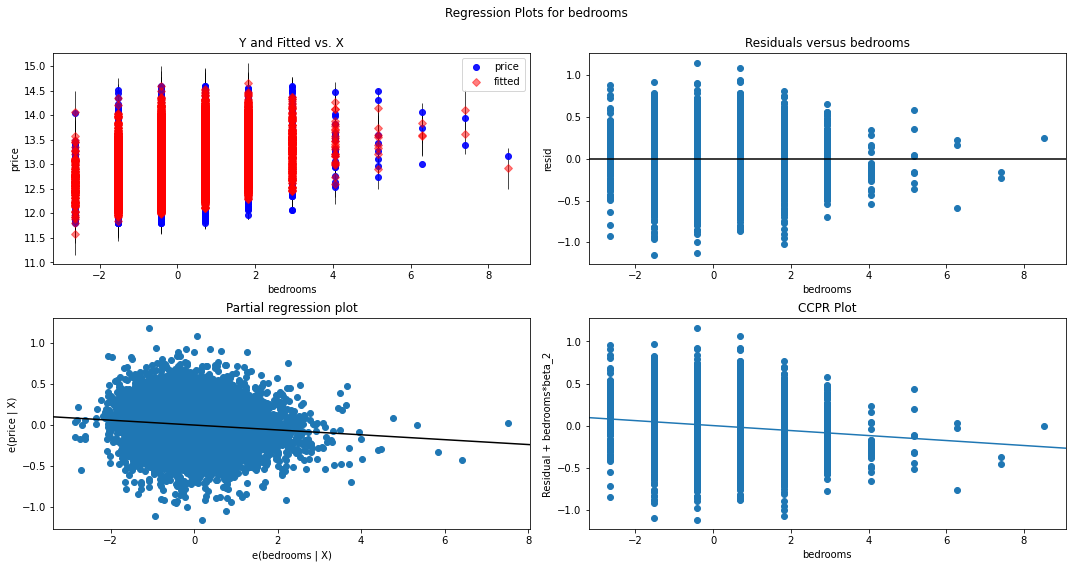

In [133]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

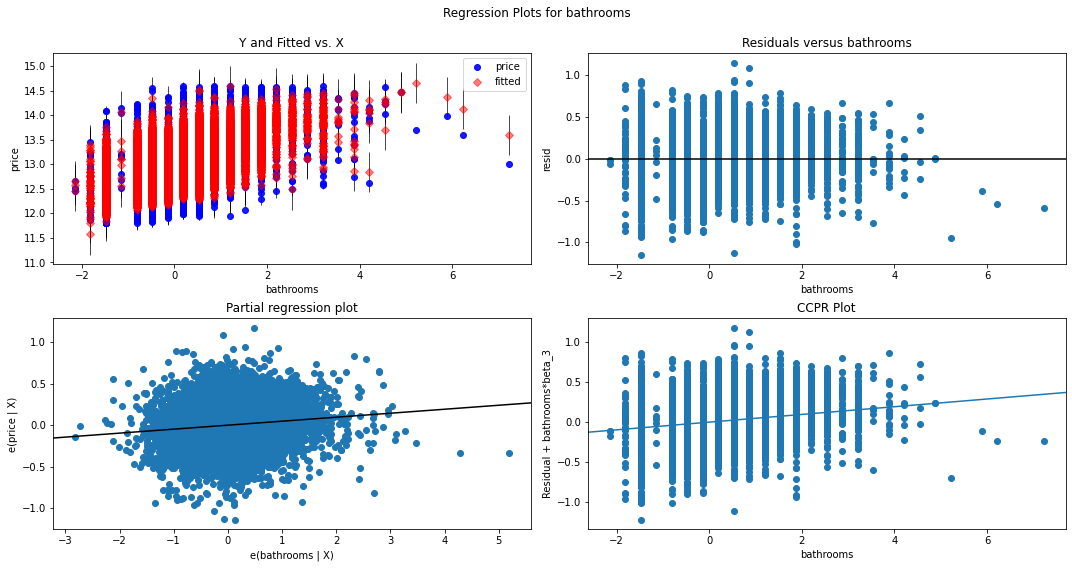

In [134]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()

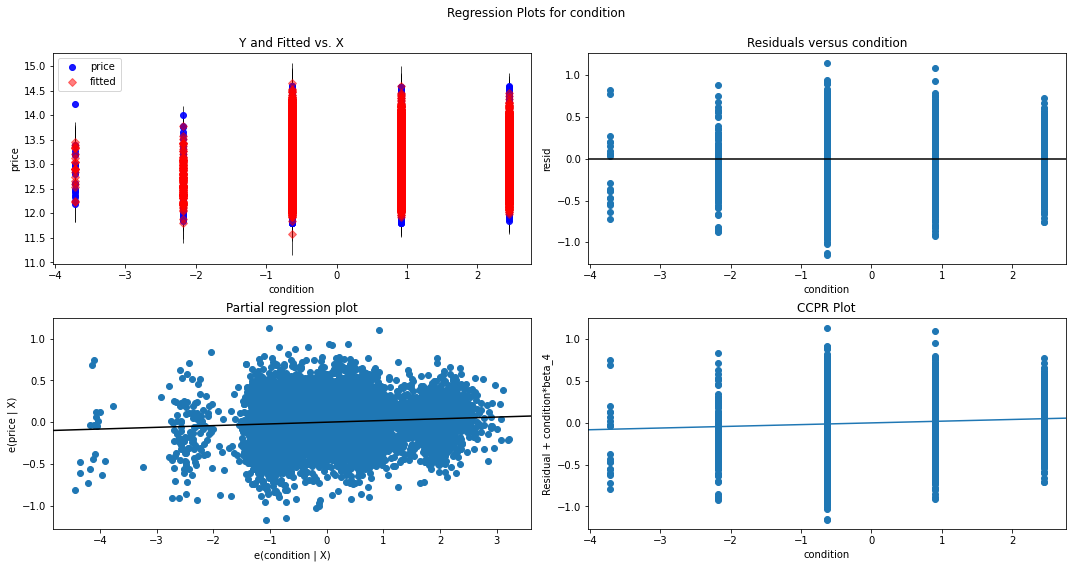

In [125]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition", fig=fig)
plt.show()

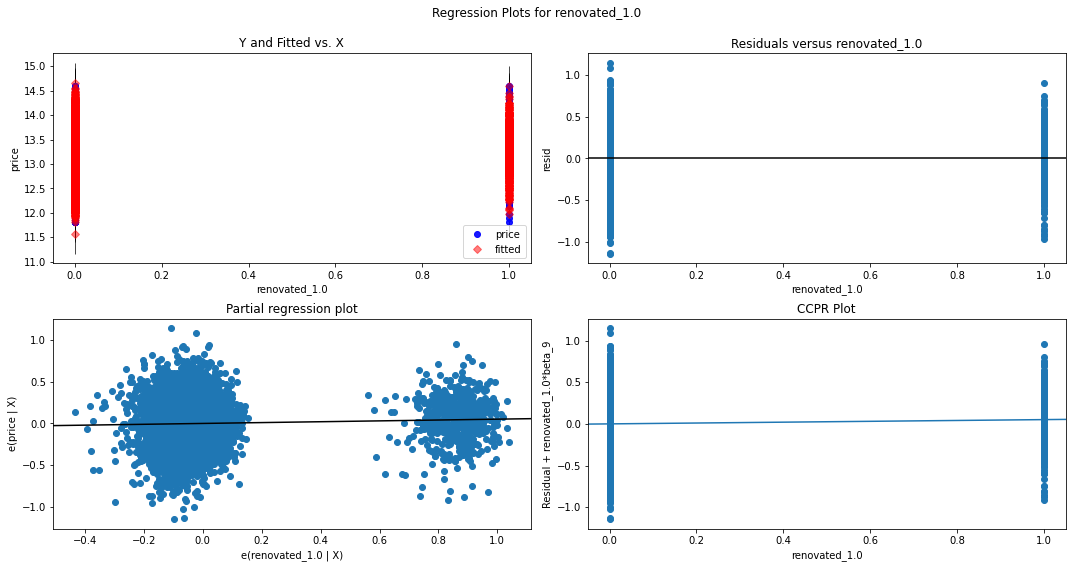

In [130]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "renovated_1.0", fig=fig)
plt.show()

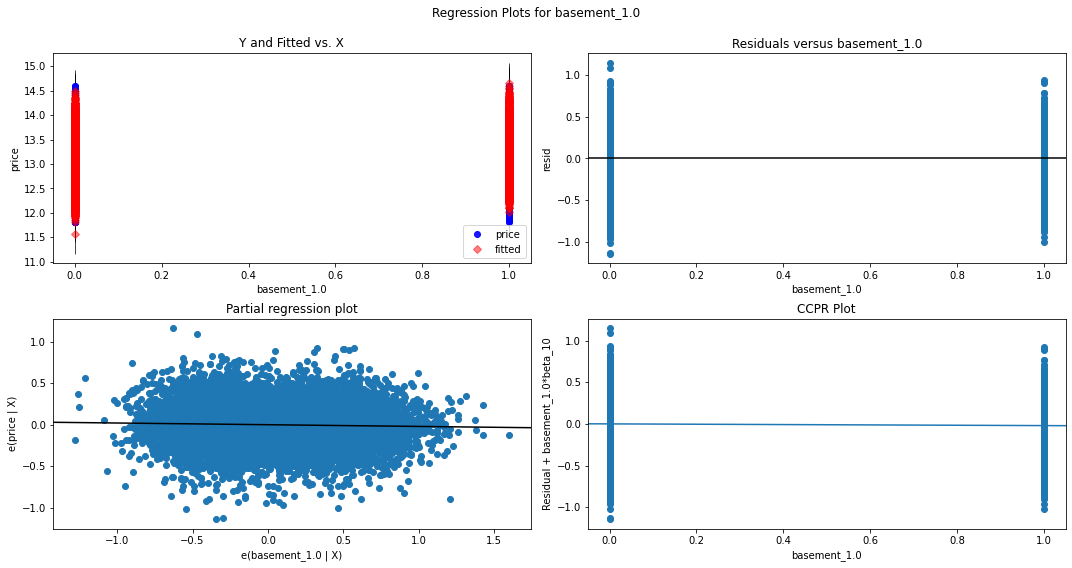

In [131]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "basement_1.0", fig=fig)
plt.show()

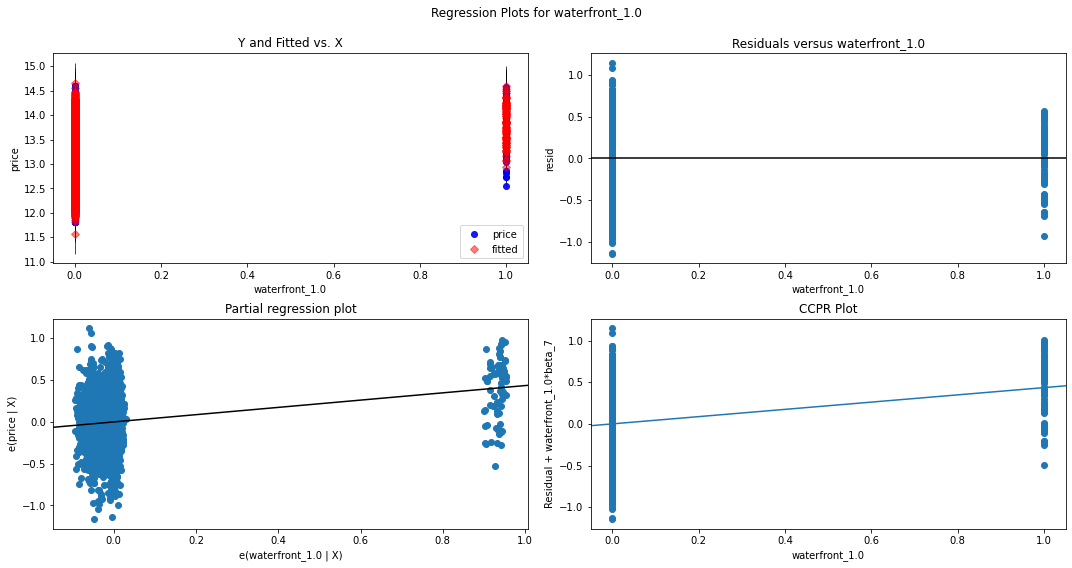

In [129]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "waterfront_1.0", fig=fig)
plt.show()

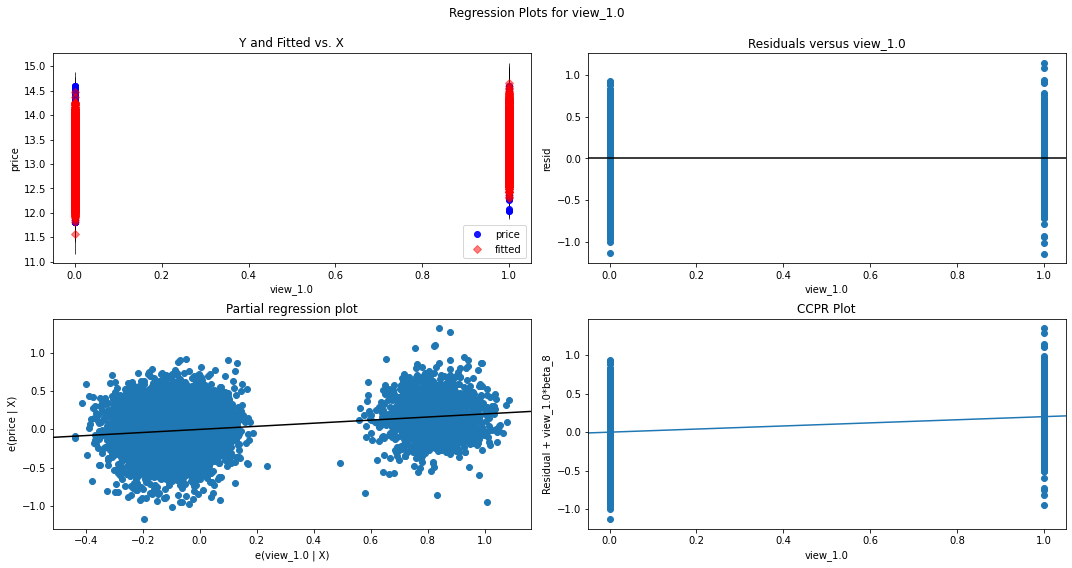

In [128]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "view_1.0", fig=fig)
plt.show()

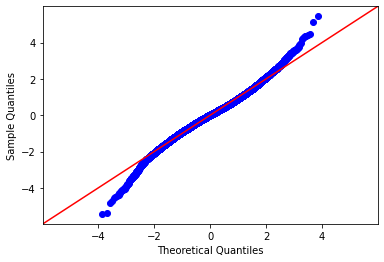

In [93]:
import scipy.stats as stats

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## Feature Selection

### Forward-Backward Selector

First we'll try a simple forward-backward feature selection model based on p-value, using a statsmodel OLS linear regression model.

This model gives us a list of the important features based on their p-value.

In [94]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
actual = np.exp(y_test)

In [95]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = included[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


result = stepwise_selection(X_train, y_train, verbose=True)

print('resulting features:', result)

Add  bathrooms                      with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zip_group_2                    with p-value 0.0
Add  zip_group_3                    with p-value 0.0
Add  zip_group_10                   with p-value 0.0
Add  zip_group_9                    with p-value 0.0
Add  zip_group_7                    with p-value 0.0
Add  zip_group_8                    with p-value 0.0
Add  view_1.0                       with p-value 7.42298e-289
Add  zip_group_6                    with p-value 2.31712e-173
Add  zip_group_5                    with p-value 3.1973e-171
Add  zip_group_4                    with p-value 0.0
Add  waterfront_1.0                 with p-value 1.62917e-85
Add  year_block_(1975.0, 1989.0]    with p-value 2.91685e-39
Add  year_block_(1959.0, 1975.0]    with p-value 2.30854e-56
Add  condition                      with p-value 5.71686e-50
Add  sqft_lot                       with p-value 1.07125e-37
Add  year_block_(1989.0, 2003.0] 

In [96]:
# Run our linear regression again, using the features recommended by our feature selector

X_train = X_train[result]
X_test = X_test[result]

predictors_int = sm.add_constant(X_train)
model = sm.OLS(y_train, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     2719.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:18:31   Log-Likelihood:                 2346.9
No. Observations:               17053   AIC:                            -4636.
Df Residuals:                   17024   BIC:                            -4411.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.6621      0.008   1600.332      0.000      12.647      12.678
bathrooms                       0.0481      0.003     16.397      0.000       0.042       0.054
sqft_living                     0.2388      0.003     75.428      0.000       0.233       0.245
zip_group_2                     0.0479      0.008      6.112      0.000       0.033       0.063
zip_group_3                     0.1685      0.008     22.221      0.000       0.154       0.183
zip_group_10                    0.8792      0.008    106.063      0.000       0.863       0.895
zip_group_9                     0.8158      0.009     94.166      0.000       0.799       0.833
zip_group_7                     0.7035      0.008     89.520      0.000       0.688       0.719
zip_group_8                     0.6694      0.007     89.935      0.000       0.655       0.684
view_1.0                        0.2011      0.006     33.278      0.000       0.189       0.213
zip_group_6                     0.4920      0.009     57.764      0.000       0.475       0.509
zip_group_5                     0.4301      0.008     55.859      0.000       0.415       0.445
zip_group_4                     0.3592      0.008     47.303      0.000       0.344       0.374
waterfront_1.0                  0.4350      0.024     18.038      0.000       0.388       0.482
year_block_(1975.0, 1989.0]    -0.1767      0.006    -27.851      0.000      -0.189      -0.164
year_block_(1959.0, 1975.0]    -0.1539      0.006    -25.349      0.000      -0.166      -0.142
condition                       0.0205      0.002     11.271      0.000       0.017       0.024
sqft_lot                        0.0281      0.002     13.140      0.000       0.024       0.032
year_block_(1989.0, 2003.0]    -0.1473      0.007    -19.849      0.000      -0.162      -0.133
year_block_(1942.0, 1959.0]    -0.0851      0.006    -14.626      0.000      -0.096      -0.074
month_4                         0.0721      0.005     13.270      0.000       0.061       0.083
bedrooms                       -0.0296      0.002    -13.448      0.000      -0.034      -0.025
year_block_(2003.0, 2015.0]    -0.0949      0.008    -12.404      0.000      -0.110      -0.080
basement_1.0                   -0.0205      0.004     -5.046      0.000      -0.028      -0.013
month_3                         0.0482      0.006      8.203      0.000       0.037       0.060
renovated_1.0                   0.0509      0.010      5.334      0.000       0.032       0.070
floors                          0.0117      0.003      4.509      0.000       0.007       0.017
month_5                         0.0185      0.005      3.535      0.000       0.008       0.029
month_2                         0.0192      0.007      2.751      0.006       0.006       0.033
===========

In [97]:
print("{} predictors used".format(len(result)))

28 predictors used


In [98]:
X_test = sm.add_constant(X_test)
predicted_home_prices = model.predict(X_test)

predicted_prices_unscaled = round(np.exp(predicted_home_prices), 0)
predicted_prices_unscaled

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_prices_unscaled})
predicted_prices['Abs_Diff'] = abs(predicted_prices.Actual - predicted_prices.Predicted)
predicted_prices

,Actual,Predicted,Abs_Diff
10895,325000.0,316424.0,8576.0
14750,650000.0,1011413.0,361413.0
9935,356000.0,320288.0,35712.0
6826,345000.0,410011.0,65011.0
11090,468000.0,596254.0,128254.0
...,...,...,...
5437,355000.0,324021.0,30979.0
17128,390000.0,393271.0,3271.0
7588,485000.0,451825.0,33175.0
10186,535000.0,426397.0,108603.0


In [99]:
round(mean_absolute_error(actual, predicted_prices_unscaled), 2)

89005.48

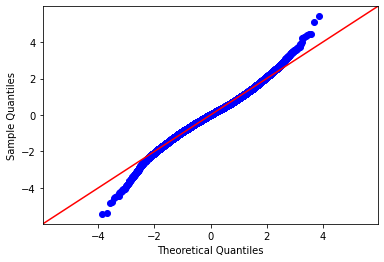

In [100]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

No change to our model accuracy. The predictors we dropped were clearly trivial.

### Permutation Importance

Next we will study feature selection via permutation importance, using a sklean LinearRegression model and the library eli5. For permutation importance, each column is individually scrambled, and the resulting error informs the feature weight. If the scramble causes high error in the results, the feature is considered important. If the scramble causes low error, the feature is considered unimportant.

This model gives us a list of important features based on how much error scrambling their columns produces.

In [101]:
# prepare linear regression data set

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
actual = np.exp(y_test)

In [102]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

perm = PermutationImportance(regressor, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.5007 ± 0.0106,zip_group_10
0.4641 ± 0.0086,sqft_living
0.4471 ± 0.0067,zip_group_8
0.4121 ± 0.0095,zip_group_7
0.3640 ± 0.0093,zip_group_9
0.1445 ± 0.0017,zip_group_5
0.1336 ± 0.0015,zip_group_6
0.1105 ± 0.0014,zip_group_4
0.0369 ± 0.0004,"year_block_(1975.0, 1989.0]"
0.0285 ± 0.0011,view_1.0


In [103]:
# sorted list of relative feature importance via permutation importance

eli = pd.DataFrame(zip(X.columns.tolist(), perm.feature_importances_))
eli.sort_values(1, ascending=False, inplace=True)
eli.reset_index(inplace=True)
eli.drop('index', axis=1, inplace=True)
eli

,0,1
0,zip_group_10,5.006852e-01
1,sqft_living,4.640640e-01
2,zip_group_8,4.470643e-01
3,zip_group_7,4.120570e-01
4,zip_group_9,3.639746e-01
5,zip_group_5,1.445449e-01
6,zip_group_6,1.336293e-01
7,zip_group_4,1.105470e-01
8,"year_block_(1975.0, 1989.0]",3.693583e-02
9,view_1.0,2.848095e-02


In [104]:
result = list(eli[:24][0])
result

['zip_group_10',
 'sqft_living',
 'zip_group_8',
 'zip_group_7',
 'zip_group_9',
 'zip_group_5',
 'zip_group_6',
 'zip_group_4',
 'year_block_(1975.0, 1989.0]',
 'view_1.0',
 'year_block_(1959.0, 1975.0]',
 'year_block_(1989.0, 2003.0]',
 'zip_group_3',
 'bathrooms',
 'year_block_(2003.0, 2015.0]',
 'year_block_(1942.0, 1959.0]',
 'bedrooms',
 'waterfront_1.0',
 'sqft_lot',
 'condition',
 'month_4',
 'zip_group_2',
 'floors',
 'month_3']

In [105]:
# Run our linear regression again, using the features recommended by our feature selector

X = X_train[result]
y = y_train

predictors_int = sm.add_constant(X)
model = sm.OLS(y, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     3156.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:18:32   Log-Likelihood:                 2310.3
No. Observations:               17053   AIC:                            -4571.
Df Residuals:                   17028   BIC:                            -4377.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.6641      0.008   1676.609      0.000      12.649      12.679
zip_group_10                    0.8804      0.008    106.019      0.000       0.864       0.897
sqft_living                     0.2346      0.003     76.797      0.000       0.229       0.241
zip_group_8                     0.6691      0.007     89.726      0.000       0.654       0.684
zip_group_7                     0.7008      0.008     89.186      0.000       0.685       0.716
zip_group_9                     0.8134      0.009     93.866      0.000       0.796       0.830
zip_group_5                     0.4300      0.008     55.738      0.000       0.415       0.445
zip_group_6                     0.4914      0.009     57.633      0.000       0.475       0.508
zip_group_4                     0.3584      0.008     47.139      0.000       0.344       0.373
year_block_(1975.0, 1989.0]    -0.1830      0.006    -29.525      0.000      -0.195      -0.171
view_1.0                        0.1989      0.006     32.967      0.000       0.187       0.211
year_block_(1959.0, 1975.0]    -0.1566      0.006    -26.009      0.000      -0.168      -0.145
year_block_(1989.0, 2003.0]    -0.1524      0.007    -21.479      0.000      -0.166      -0.139
zip_group_3                     0.1695      0.008     22.304      0.000       0.155       0.184
bathrooms                       0.0479      0.003     16.616      0.000       0.042       0.054
year_block_(2003.0, 2015.0]    -0.1014      0.007    -13.816      0.000      -0.116      -0.087
year_block_(1942.0, 1959.0]    -0.0863      0.006    -14.866      0.000      -0.098      -0.075
bedrooms                       -0.0295      0.002    -13.422      0.000      -0.034      -0.025
waterfront_1.0                  0.4427      0.024     18.363      0.000       0.395       0.490
sqft_lot                        0.0314      0.002     15.321      0.000       0.027       0.035
condition                       0.0190      0.002     10.559      0.000       0.015       0.023
month_4                         0.0677      0.005     12.621      0.000       0.057       0.078
zip_group_2                     0.0494      0.008      6.293      0.000       0.034       0.065
floors                          0.0175      0.002      7.326      0.000       0.013       0.022
month_3                         0.0441      0.006      7.586      0.000       0.033       0.055
==============================================================================
Omnibus:                      434.316   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1044.600
Skew:                          -0.047   Prob(JB):                    1.47e-227
Kurtosis:                       4.209   Cond. No.                         24.1


In [106]:
X_test = X_test[result]
X_test = sm.add_constant(X_test)

predicted_home_prices = model.predict(X_test)

predicted_prices_unscaled = round(np.exp(predicted_home_prices),0)
predicted_prices_unscaled

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_prices_unscaled})
predicted_prices['Abs_Diff'] = abs(predicted_prices.Actual - predicted_prices.Predicted)
predicted_prices

,Actual,Predicted,Abs_Diff
10895,325000.0,313836.0,11164.0
14750,650000.0,1013494.0,363494.0
9935,356000.0,315071.0,40929.0
6826,345000.0,410355.0,65355.0
11090,468000.0,594861.0,126861.0
...,...,...,...
5437,355000.0,327588.0,27412.0
17128,390000.0,398411.0,8411.0
7588,485000.0,462408.0,22592.0
10186,535000.0,429082.0,105918.0


In [107]:
round(mean_absolute_error(actual, predicted_prices_unscaled), 2)

89058.65

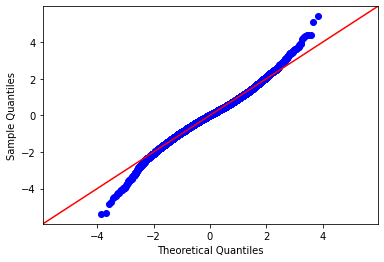

In [108]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### Recursive Feature Elimination with Cross Validation - Linear Regression

In [109]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
actual = np.exp(y_test)

In [110]:
# picks the number of features itself
# the error score it is using, neg_mean_absolute_error, higher(closer to 0) is better

model = LinearRegression()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='neg_mean_absolute_error')

rfecv.fit(X_train, y_train)

RFECV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
      estimator=LinearRegression(), scoring='neg_mean_absolute_error')

In [111]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 35


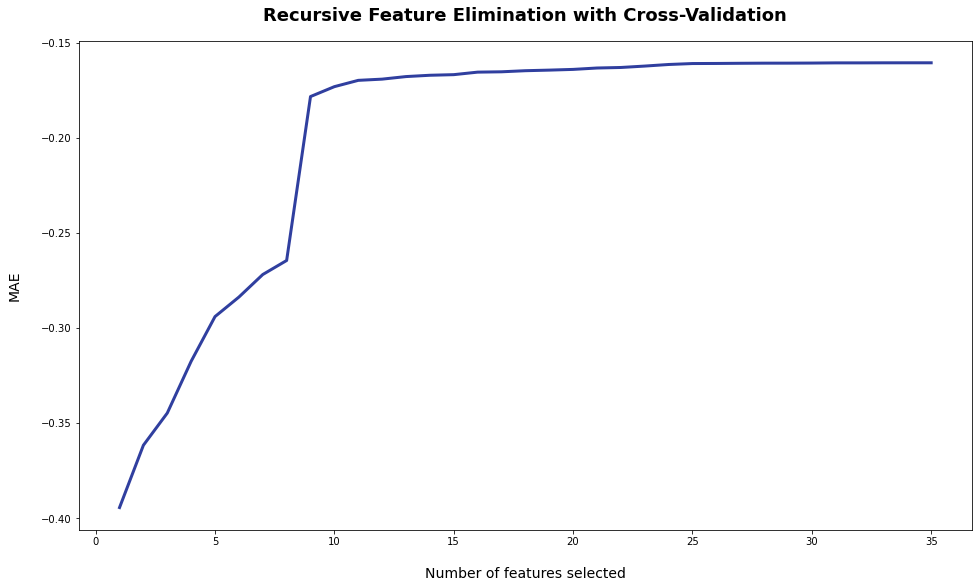

In [112]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('MAE', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [113]:
predicted_home_prices = rfecv.predict(X_test)

predicted_prices_unscaled = np.exp(predicted_home_prices)
predicted_prices_unscaled

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_prices_unscaled})
predicted_prices['Abs_Diff'] = abs(predicted_prices.Actual - predicted_prices.Predicted)
predicted_prices

,Actual,Predicted,Abs_Diff
10895,325000.0,3.163875e+05,8612.477472
14750,650000.0,1.011063e+06,361063.265272
9935,356000.0,3.202172e+05,35782.837124
6826,345000.0,4.057130e+05,60713.002516
11090,468000.0,5.960457e+05,128045.673248
...,...,...,...
5437,355000.0,3.240555e+05,30944.498143
17128,390000.0,3.937152e+05,3715.198382
7588,485000.0,4.518227e+05,33177.283500
10186,535000.0,4.263521e+05,108647.884468


In [114]:
round(mean_absolute_error(actual, predicted_prices_unscaled), 2)

89020.04

### Visualizing MAE at different features selected

>1 0.012 (0.007)
>2 0.165 (0.017)
>3 0.242 (0.017)
>4 0.340 (0.014)
>5 0.421 (0.013)
>6 0.457 (0.013)
>7 0.494 (0.013)
>8 0.517 (0.012)
>9 0.774 (0.006)
>10 0.789 (0.007)
>11 0.796 (0.006)
>12 0.798 (0.007)
>13 0.801 (0.006)
>14 0.802 (0.006)
>15 0.803 (0.006)
>16 0.805 (0.007)
>17 0.806 (0.007)
>18 0.807 (0.007)
>19 0.808 (0.007)
>20 0.808 (0.007)
>21 0.810 (0.007)
>22 0.811 (0.007)
>23 0.813 (0.006)
>24 0.815 (0.006)
>25 0.816 (0.006)
>26 0.816 (0.006)
>27 0.816 (0.006)
>28 0.816 (0.006)
>29 0.816 (0.006)
>30 0.816 (0.006)
>31 0.816 (0.006)
>32 0.816 (0.006)
>33 0.816 (0.006)
>34 0.816 (0.006)
>35 0.816 (0.006)
>36 0.816 (0.006)


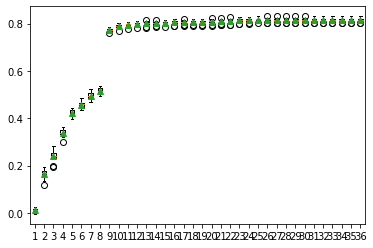

In [116]:
# explore the number of selected features for RFE

# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1, 37):
        rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
        model = LinearRegression()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# Decision Tree Model

### Experimenting with tree depths

In [ ]:
X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

actual = y_test

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_4 = DecisionTreeRegressor(max_depth=20)
regr_5 = DecisionTreeRegressor(max_depth=30)


regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)
regr_5.fit(X_train, y_train)


In [ ]:
predicted_2 = regr_1.predict(X_test)
predicted_5 = regr_2.predict(X_test)
predicted_10 = regr_3.predict(X_test)
predicted_20 = regr_4.predict(X_test)
predicted_30 = regr_5.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted_2": predicted_2, "Predicted_5": predicted_5, "Predicted_10": predicted_10, "Predicted_20": predicted_20, "Predicted_30": predicted_30})
predicted_prices


In [ ]:

round(mean_absolute_error(actual, predicted_2), 2), round(mean_absolute_error(actual, predicted_5), 2), round(mean_absolute_error(actual, predicted_10), 2), round(mean_absolute_error(actual, predicted_20), 2), round(mean_absolute_error(actual, predicted_30), 2)

A tree depth somewhere in the middle gives us the best result

### To Do - 

write function that incorporates all of our learned things into one decision tree function that both looks for the best combo of features, and looks at different tree depth, and returns these for the model.

### DecisionTreeRegressor identifying feature importance without CV

Now we are studying our feature importance using a Decision Tree model. Decision trees support non-linearity, and are good when there are a lot of categorical variables. This output tells us the features that have the most weight in a Decision Tree algorithm.

The model gives us a list of important features based on how much they influenced the decision tree accuracy.

In [ ]:
# We need to use our tree algorithm data sets for this algorithm. Tree algorithms are not sensitive to feature scaling,
# and do not need to be log transformed or normalizd

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

actual = y_test

In [ ]:
# create the random forest with your hyperparameters.
model = DecisionTreeRegressor()

# fit the model to start training.
model.fit(X_train, y_train)

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.
final_df = pd.DataFrame({"Features": X.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances', ascending=False)


final_df

Model prediction without CV with Decision Tree as our algorithm

In [ ]:
predicted_home_prices = model.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices['Abs_Diff'] = abs(predicted_prices.Actual - predicted_prices.Predicted)
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

### Recursive Feature Elimination with Cross Validation - Decision Tree

In [ ]:
# We need to use our tree algorithm data sets for this algorithm. Tree algorithms are not sensitive to feature scaling,
# and do not need to be log transformed or normalizd

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

actual = y_test

In [ ]:
# picks the number of features itself
# the error score it is using, neg_mean_absolute_error, higher(closer to 0) is better

model = DecisionTreeRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='neg_mean_absolute_error')

rfecv.fit(X_train, y_train)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('MAE', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['used'] = rfecv.support_

imp_values = dset[(dset['used'] == True)]
imp_values['importance'] = rfecv.estimator_.feature_importances_
imp_values = imp_values.sort_values(by='importance', ascending=False)
imp_values

plt.figure(figsize=(16, 14))
plt.barh(y=imp_values['attr'], width=imp_values['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
predicted_home_prices = rfecv.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices['Abs_Diff'] = abs(predicted_prices.Actual - predicted_prices.Predicted)
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

### Visualising MAE at different features selected

In [ ]:
# prepare tree regression data set

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

actual = y_test

In [ ]:
# explore the number of selected features for RFE

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(6, 37):
        rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
        model = DecisionTreeRegressor()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
model = DecisionTreeRegressor()
rfe = RFE(estimator=model, n_features_to_select=30)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rfe, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

rfe.fit(X_train, y_train)

print(np.mean(scores))


In [ ]:
predicted_home_prices = rfe.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices['Abs_Diff'] = abs(predicted_prices.Actual - predicted_prices.Predicted)
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

### Later?
Gradient Boosting

In [ ]:
# prepare tree regression data set

X = preprocessed_trees.iloc[:1000]['sqft_living']
y = preprocessed_trees.iloc[:1000]['price']

X = np.array(X)
X = X.reshape(-1, 1)

X.shape
y.shape

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.figure(figsize=(15, 4))
plt.scatter(X, y, alpha=.7);

In [ ]:
def many_trees(n_trees, clf=False, **kwargs):
    trees = [DecisionTreeRegressor(**kwargs) for i in range(n_trees)]
    return trees

def boost(trees, X, y):
    fitted = []
    for tree in trees:
        tree.fit(X, y)
        yhat = tree.predict(X)
        y = (y-yhat) 
        fitted.append(tree)
    return fitted
        
def predict(trees, X):
    return np.array([tree.predict(X) for tree in trees])

In [ ]:
samples = X.shape[0]

learners = many_trees(samples, max_depth=1)
fitted = boost(learners, X, y)
boosted_yhat = predict(fitted, X)

xfit = np.linspace(0, 10, samples).reshape(-1, 1)

sample_ix = np.arange(X.shape[0])

def plot_fits(n_trees, row):
    preds_t = boosted_yhat[:, :n_trees]
    boosted_pred = preds_t.sum(1)
    res = boosted_pred-y
    axes[row, 0].plot(xfit, boosted_pred, c='red')
    axes[row, 0].scatter(X, y)
    axes[row, 0].set_title(f"Fit after {n_trees} trees", fontsize=15)
    axes[row, 1].scatter(sample_ix, res, alpha=0.7)
    axes[row, 1].plot(res, color='r', alpha=0.7)
    axes[row, 1].set_title(f"Residuals after {n_trees} trees", fontsize=15)

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,25))
plot_fits(1, 0)
plot_fits(5, 1)
plot_fits(15, 2)
plot_fits(20, 3)
plot_fits(25, 4)
plot_fits(30, 5)

fig.tight_layout()

In [ ]:
plt.figure(figsize=(15, 4))

pred = 0
for i in range(len(learners)):
    pred += boosted_yhat[:, i]
    plt.plot(xfit, pred)
plt.plot(xfit, predict(learners, X).sum(1))
plt.xlabel("X")
plt.ylabel("y");

plt.scatter(X, y, alpha=.4);

reference: https://towardsdatascience.com/gradient-boosting-is-one-of-the-most-effective-ml-techniques-out-there-af6bfd0df342

# TO DO

Find interactions!

Calculate model residuals

Measure by RMSE?

bias, variance, residuals, interactions

Visuals:
* zip code map

# Stuff I'm not using

THIS IS MODEL building and diagnosis problem, there are many way to do it, according your statement I think the following will be easy. Assume the dependent variable is continuous and normal distributed as you stated
1.       Check the type of co factors, if some have a lot of missing value or typo, correct them or let them out. Then for continuous factors, check the person correlation coefficients,  if Pearson correlation near 1 or -1 among any two, one should be gone in multiple regression. For category factors, check independency of any two. if most count appear in the diagonal of the contingence table, one of the two category variables should be gone.
2.       Draw the scatter plots between the continuous outcome and each independent quantitative factor to see the association: if linear trend is shown, the factor is in, if non-linear effect is shown, transformation is needed. If no trend, like random, the independent factor could be out.
3.       Suppose the dependent variable should be independent. If the dependent variable is related to time, check the auto correlation, if autocorrelation exists,  time series modeling say Autoreg might be used.
4.       Do PCA analysis to see if there are still multicolinearity among the independent factors, if some eigen-value is near zero, you may drop one of them, or define a new factor (transformation) .
5.       If the sample size is large enough, say 10 (at least) times higher of the unknown parameter number, you can  do multiple regressions, you may use auto select option, such as forward backward or best, which will select independent factors for you.
6.       Number of parameters: interception: count 1, continuous factor, each counts 1, categorical factor with level of k, count as k-1.
7.       Check outliers by leverage or CooksD or Residual, if exists you may delete them or do both model with and without the outliers.
8.       Check normality of residuals from the multi variable regression,    if violated, do transformation, variance homogeneity exist: transformation on some independent factor, variance homogeneity doesn’t exist: transformation on dependent factor. Those may improve your model fitting.
9.       You may use Akaike’s information criterion or Bayesian information criterion or Mallows’ CP to decide how many factors should be in. Using them is better than comparison of  R2.
10.   Check interaction among the independent factors, the interaction among two quantitative predictors, means there is joint effect; the effect of one factor varies across the level of another factor. If the interaction between an quantitation factor and a category factor, say gender, it means the effect of the quantitative, slope,  is different between males and females.